In [1]:
import spacy
import textacy
import textacy.preprocessing
import textacy.resources
from spacy.symbols import ORTH, POS, NOUN, VERB,PRON
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt 
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from networkx.readwrite import json_graph;
import json
from afinn import Afinn
afn = Afinn()
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag
lemmatizer = WordNetLemmatizer()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from sentistrength import PySentiStr
senti = PySentiStr()
senti.setSentiStrengthPath('D:/github/causal-graph-acquisition/SentiStrengthCom.jar')
senti.setSentiStrengthLanguageFolderPath('D:/github/causal-graph-acquisition/SentStrength_Data_Sept2011/')
import pandas as pd
from IPython.display import display
import collections
from pd_replicator import replicator

from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax
MODEL = f"cardiffnlp/twitter-xlm-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
from nltk.corpus import stopwords
set(stopwords.words('english'))

from nltk.stem import PorterStemmer
ps = PorterStemmer()

nlp = spacy.load("en_core_web_sm")

import inflect
m = inflect.engine()
from lemminflect import getInflection

from scipy.special import kl_div

import pysmile
pysmile.License((
	b"SMILE LICENSE b120d7f5 e03fbc6a 3007cd19 "
	b"THIS IS AN ACADEMIC LICENSE AND CAN BE USED "
	b"SOLELY FOR ACADEMIC RESEARCH AND TEACHING, "
	b"AS DEFINED IN THE BAYESFUSION ACADEMIC "
	b"SOFTWARE LICENSING AGREEMENT. "
	b"Serial #: 5pmgy44gtgzun5gqbh8o40u5n "
	b"Issued for: Solat Jabeen (solatjabeen@yahoo.com) "
	b"Academic institution: Institute of Business Administration "
	b"Valid until: 2024-08-17 "
	b"Issued by BayesFusion activation server"
	),[
	0x2c,0x65,0x6e,0x68,0x4d,0x79,0xf1,0x5d,0x62,0xd2,0xcc,0xab,0x2f,0x8d,0x6d,0xf7,
	0x40,0x38,0x7d,0xab,0xca,0x8e,0xf2,0x6a,0x80,0xb5,0xee,0xdd,0x44,0xcb,0x66,0x1d,
	0xd7,0x98,0xad,0x8f,0x76,0xa0,0x1c,0x7a,0x64,0xb0,0xfb,0x81,0x62,0xaf,0xd6,0x3f,
	0xb2,0x06,0x62,0x66,0xf9,0x5f,0x5a,0x62,0x74,0x39,0xd0,0x6b,0xf6,0x03,0xef,0x45])

In [2]:
dagCauseSents = []

edge1 = './Text/Test_Gambella_CS.txt'
narrative = open(edge1, encoding="utf8").read()
narrative = textacy.preprocessing.normalize_quotation_marks(narrative)
narrative = narrative.lower()

raw_sentences = sent_tokenize(narrative)

print(len(raw_sentences))

for s in raw_sentences:
    dagCauseSents.append(s)

47


In [3]:
import csv 

dagCauseTriples = []
dagCauseVerbs = []

csv_filename = './Text/Test_Gambella_CT.txt'
with open(csv_filename) as f:
    reader = csv.reader(f)
    dagCauseTriples = list(tuple(line) for line in reader)
    
for s in dagCauseTriples:
    dagCauseVerbs.append(s[1])

In [4]:
for i,j,k in zip(dagCauseSents,dagCauseTriples,dagCauseVerbs):
    print(i,j,k)

direct aid negatively impacts extreme poverty. ('direct aid', 'negatively impacts', 'extreme poverty') negatively impacts
food aid provision positively impacts food aid. ('food aid provision', 'positively impacts', 'food aid') positively impacts
food aid positively impacts food availability. ('food aid', 'positively impacts', 'food availability') positively impacts
displacement positively impacts refugee population. ('displacement', 'positively impacts', 'refugee population') positively impacts
refugee population negatively impacts food availability. ('refugee population', 'negatively impacts', 'food availability') negatively impacts
refugee population negatively impacts labor. ('refugee population', 'negatively impacts', 'labor') negatively impacts
displacement positively impacts extreme poverty. ('displacement', 'positively impacts', 'extreme poverty') positively impacts
population positively impacts labor. ('population', 'positively impacts', 'labor') positively impacts
labor positi

Nodes: 30
Edges: 44
direct aid , extreme poverty
extreme poverty , food availability
food aid provision , food aid
food aid , food availability
food availability , food security
displacement , refugee population
displacement , extreme poverty
refugee population , food availability
population , labor
labor , local food production
local food production , food processing and distribution
local food production , food availability
conflict resolution , conflict
conflict , labor
conflict , market access
conflict , road transport
conflict , rail transport
conflict , river/lake transport
conflict , arable land
market access , food availability
road transport , food processing and distribution
rail transport , food processing and distribution
river/lake transport , food processing and distribution
arable land , local food production
food processing and distribution , market access
food imports , road transport
food imports , rail transport
flood , refugee population
flood , road transport
flood

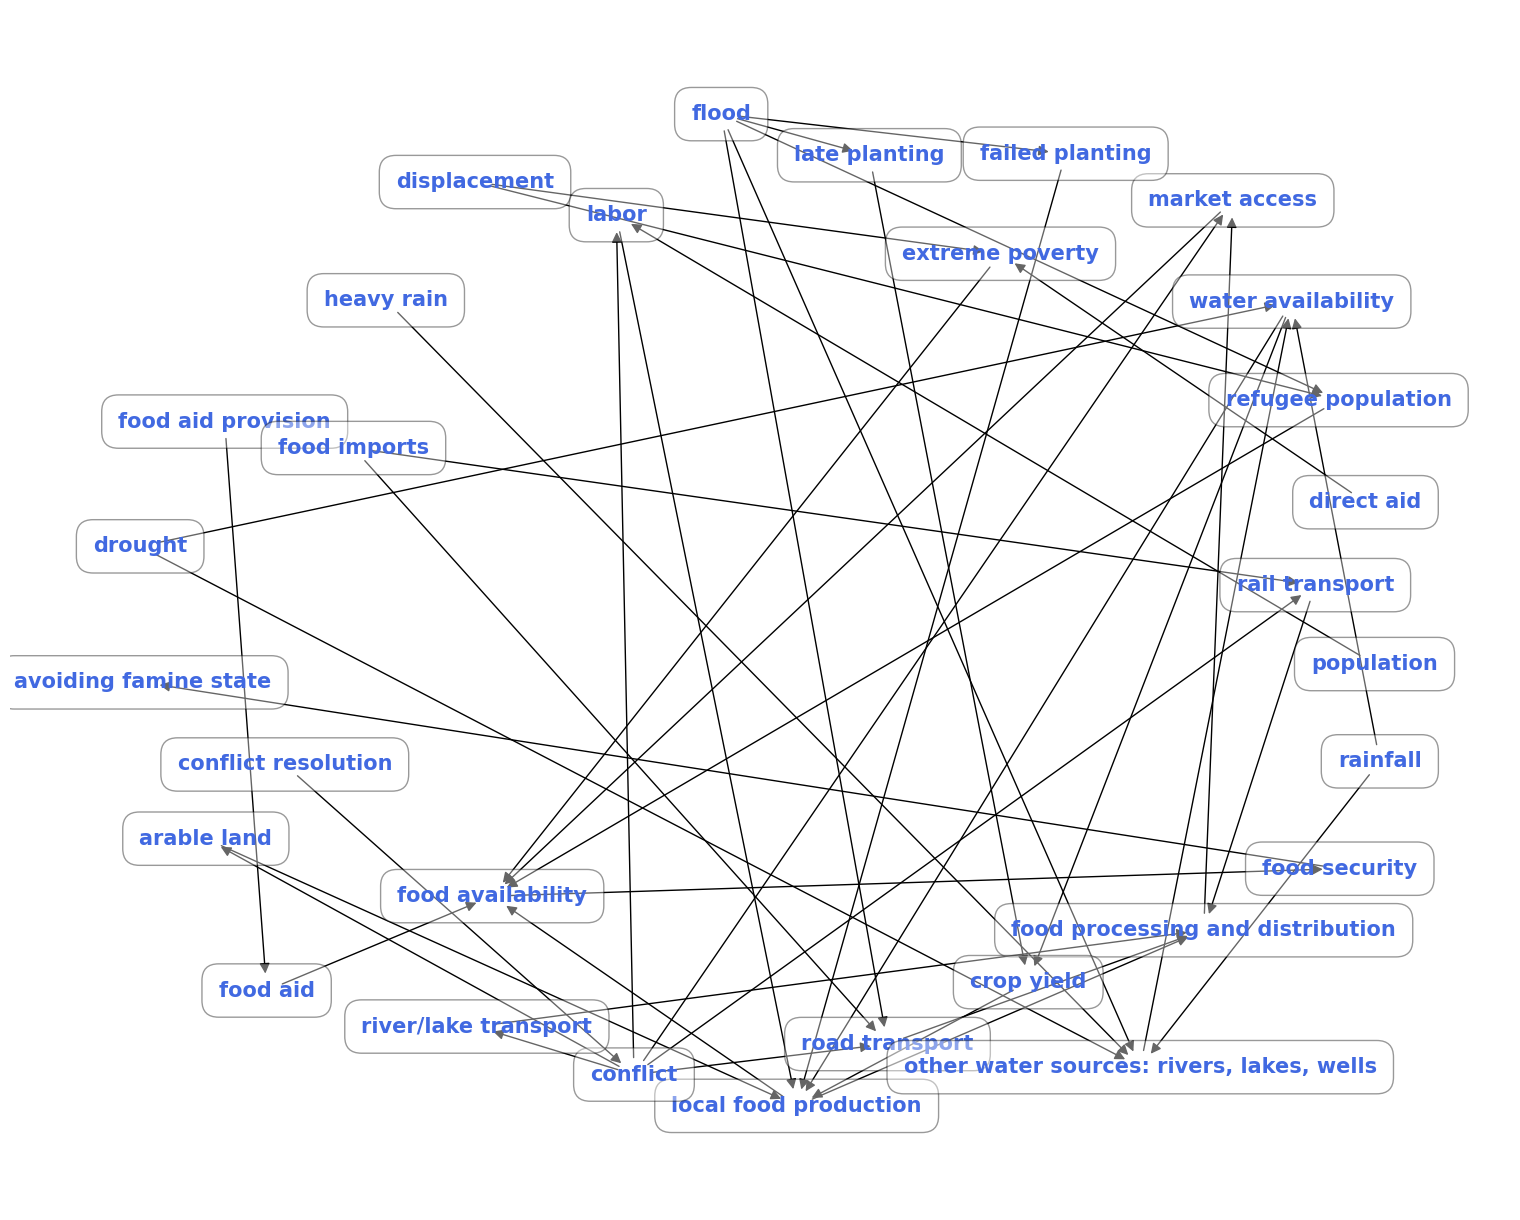

In [5]:
cg = nx.DiGraph()
cg.add_node("direct aid",id = str("direct aid"),title=str("direct aid"),x=615,y=200)
cg.add_node("extreme poverty",id = str("extreme poverty"),title=str("extreme poverty"),x=615,y=200)
cg.add_node("food aid provision",id = str("food aid provision"),title= str("food aid provision"),x=615,y=200)
cg.add_node("food aid",id = str("food aid"),title=str("food aid"),x=615,y=200)
cg.add_node("food availability",id = str("food availability"),title=str("food availability"),x=615,y=200)
cg.add_node("displacement",id = str("Displacement"),title=str("Displacement"),x=615,y=200)
cg.add_node("refugee population",id = str("refugee population"),title=str("refugee population"),x=615,y=200)
cg.add_node("population",id = str("population"),title=str("population"),x=615,y=200)
cg.add_node("labor",id = str("labor"),title=str("labor"),x=615,y=200)
cg.add_node("local food production",id = str("local food production"),title=str("local food production"),x=615,y=200)
cg.add_node("conflict resolution",id = str("conflict resolution"),title=str("conflict resolution"),x=615,y=200)
cg.add_node("conflict",id = str("conflict"),title=str("conflict"),x=615,y=200)
cg.add_node("market access",id = str("market access"),title=str("market access"),x=615,y=200)
cg.add_node("road transport",id = str("road transport"),title=str("road transport"),x=615,y=200)
cg.add_node("rail transport",id = str("rail transport"),title=str("rail transport"),x=615,y=200)
cg.add_node("river/lake transport",id = str("river/lake transport"),title=str("river/lake transport"),x=615,y=200)
cg.add_node("arable land",id = str("arable land"),title=str("arable land"),x=615,y=200)
cg.add_node("food processing and distribution",id = str("food processing and distribution"),title=str("food processing and distribution"),x=615,y=200)
cg.add_node("food imports",id = str("food imports"),title=str("food imports"),x=615,y=200)
cg.add_node("flood",id = str("flood"),title=str("flood"),x=615,y=200)
cg.add_node("failed planting",id = str("failed planting"),title=str("failed planting"),x=615,y=200)
cg.add_node("late planting",id = str("late planting"),title=str("late planting"),x=615,y=200)
cg.add_node("other water sources: rivers, lakes, wells",id = str("other water sources: rivers, lakes, wells"),title=str("other water sources: rivers, lakes, wells"),x=615,y=200)
cg.add_node("crop yield",id = str("crop yield"),title=str("crop yield"),x=615,y=200)
cg.add_node("heavy rain",id = str("heavy rain"),title=str("heavy rain"),x=615,y=200)
cg.add_node("rainfall",id = str("rainfall"),title=str("rainfall"),x=615,y=200)
cg.add_node("water availability",id = str("water availability"),title=str("water availability"),x=615,y=200)
cg.add_node("drought",id = str("drought"),title=str("drought"),x=615,y=200)
cg.add_node("food security",id = str("food security"),title=str("food security"),x=615,y=200)
cg.add_node("avoiding famine state",id = str("avoiding famine state"),title=str("avoiding famine state"),x=615,y=200)


cg.add_edge("direct aid", "extreme poverty")
cg.add_edge("food aid provision", "food aid")
cg.add_edge("food aid", "food availability")
cg.add_edge("displacement", "refugee population")
cg.add_edge("refugee population", "food availability")
cg.add_edge("displacement", "extreme poverty")
cg.add_edge("population", "labor")
cg.add_edge("labor", "local food production")
cg.add_edge("extreme poverty", "food availability")
cg.add_edge("conflict resolution", "conflict")
cg.add_edge("conflict", "labor")
cg.add_edge("conflict", "market access")
cg.add_edge("conflict", "road transport")
cg.add_edge("conflict", "rail transport")
cg.add_edge("conflict", "river/lake transport")
cg.add_edge("conflict", "arable land")
cg.add_edge("market access", "food availability")
cg.add_edge("road transport", "food processing and distribution")
cg.add_edge("food processing and distribution", "market access")
cg.add_edge("rail transport", "food processing and distribution")
cg.add_edge("river/lake transport", "food processing and distribution")
cg.add_edge("arable land", "local food production")
cg.add_edge("local food production", "food processing and distribution")
cg.add_edge("local food production", "food availability")
cg.add_edge("food imports", "road transport")
cg.add_edge("food imports", "rail transport")
cg.add_edge("flood", "refugee population")
cg.add_edge("flood", "road transport")
cg.add_edge("flood", "failed planting")
cg.add_edge("flood", "late planting")
cg.add_edge("flood", "other water sources: rivers, lakes, wells")
cg.add_edge("failed planting", "local food production")
cg.add_edge("late planting", "crop yield")
cg.add_edge("crop yield", "local food production")
cg.add_edge("heavy rain", "other water sources: rivers, lakes, wells")
cg.add_edge("rainfall", "other water sources: rivers, lakes, wells")
cg.add_edge("rainfall", "water availability")
cg.add_edge("drought", "other water sources: rivers, lakes, wells")
cg.add_edge("drought", "water availability")
cg.add_edge("other water sources: rivers, lakes, wells", "water availability")
cg.add_edge("water availability", "crop yield")
cg.add_edge("water availability", "local food production")
cg.add_edge("food availability", "food security")
cg.add_edge("food security", "avoiding famine state")


print("Nodes:",len(cg.nodes))
print("Edges:",len(cg.edges))

for e in cg.edges(data=True):
    print(e[0],",",e[1])

pos = nx.spring_layout(cg, k=4, iterations=20)
plt.figure(figsize=(15,12))

nx.draw(cg, pos=pos, with_labels=True,  node_shape="s",  node_color="none", font_size=15,  font_color='royalblue', font_weight='bold',bbox=dict(facecolor="white", alpha=0.4,boxstyle='round,pad=0.8'),labels={node: node for node in cg.nodes()},arrows=True, arrowsize=15,width=1)
edge_labels = nx.get_edge_attributes(cg,'predicade')
nx.draw_networkx_edge_labels(cg, pos=pos, edge_labels = edge_labels, font_color='black',font_size=13)

plt.axis('off')
plt.show()

In [6]:
def Allen_sents_SentLevel(causalSentences):
    allen = []
    for sent in causalSentences:
        encoded_input = tokenizer(str(sent), return_tensors='pt')
        output = model(**encoded_input)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        if scores[0] > scores[1] and scores[0] > scores[2]:
            score = scores[0] * -1
            score = round(score,3)
            allen.append(score)
            # allen.append(-1)
        elif scores[2] > scores[1] and scores[2] > scores[0]:
            scores[2] = round(scores[2],3)
            allen.append(scores[2])
            # allen.append(1)
        else:
            # allen.append(scores[1])
            allen.append(0)
    return allen

In [7]:
def Afinn_sents_SentLevel(causalSentences):
    afinn = []
    for sent in causalSentences:
        #print(sent)
        score = afn.score(str(sent))
        #print(score)
        if score < -5:
            score = -5
        elif score > 5:
            score = 5
        score = score/5
        score = round(score,3)
        afinn.append(score)
    return afinn

In [8]:
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    #print(vs)
    return vs['compound']

def Vader_sents_SentLevel(causalSentences):
    vader = []
    for sent in causalSentences:
        #print(sent)
        #vaderTup = []
        compound = vadersentimentanalysis(str(sent))
        compound = round(compound,3)
        vader.append(compound)
    return vader

In [9]:
def Senti_sents_SentLevel(causalSentences):
    sentiStrength = []
    for sent in causalSentences:
        #print(sent)
        result = senti.getSentiment(str(sent), score='scale')
        #print(result)
        result = result[0]/4
        result = round(result,3)
        sentiStrength.append(result)
    return sentiStrength

In [10]:
allen = Allen_sents_SentLevel(dagCauseSents)
afinn = Afinn_sents_SentLevel(dagCauseSents)
vader = Vader_sents_SentLevel(dagCauseSents)
sentiStrength = Senti_sents_SentLevel(dagCauseSents)

df_CSW = pd.DataFrame(list(zip(dagCauseSents, allen, afinn, vader,sentiStrength)), columns =['Causal Sentence', 'HuggingFace','Afinn','Vader','SentiStrength'])

df_CSW["Weight"] = df_CSW.sum(axis=1)

for i in df_CSW.index:
    count = 0
    if df_CSW["HuggingFace"][i] != 0:
        count = count + 1
    if df_CSW["Afinn"][i] != 0:
        count = count + 1
    if df_CSW["Vader"][i] != 0:
        count = count + 1
    if df_CSW["SentiStrength"][i] != 0:
        count = count + 1
    if count == 0:
        count = 1
    df_CSW["Weight"][i] = round(df_CSW["Weight"][i]/count,3)

sentPolarity = []
sentsWeight_sentLevel = []

for index, row in df_CSW.iterrows():
    sentWeightTuple = []
    weight = row['Weight']
    sentWeightTuple.append(weight)
    sentsWeight_sentLevel.append(sentWeightTuple)
    #print(weight)
    if weight >= -1 and weight < -0.6:
        sentPolarity.append('Strong Negative') 
    elif weight >= -0.6 and weight < -0.3:
        sentPolarity.append('Moderate Negative')
    elif weight >= -0.3 and weight < 0:
        sentPolarity.append('Weak Negative')
    elif weight == 0:
        sentPolarity.append('Neutral')
    elif weight <= 1 and weight > 0.6:
        sentPolarity.append('Strong Positive')
    elif weight <= 0.6 and weight > 0.3:
        sentPolarity.append('Moderate Positive')
    elif weight <= 0.3 and weight > 0:
        sentPolarity.append('Weak Positive')

df_CSW["Polarity"] = sentPolarity
df_CSW.style

C:\Users\sjsheikh\Anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
C:\Users\sjsheikh\Anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Causal Sentence,HuggingFace,Afinn,Vader,SentiStrength,Weight,Polarity
0,direct aid negatively impacts extreme poverty.,-0.896000,-0.200000,-0.556000,-0.250000,-0.476000,Moderate Negative
1,food aid provision positively impacts food aid.,0.547000,0.400000,0.527000,0.500000,0.493000,Moderate Positive
2,food aid positively impacts food availability.,0.674000,0.400000,0.527000,0.500000,0.525000,Moderate Positive
3,displacement positively impacts refugee population.,0.512000,0.400000,0.527000,0.250000,0.422000,Moderate Positive
4,refugee population negatively impacts food availability.,-0.793000,0.000000,0.000000,-0.250000,-0.522000,Moderate Negative
5,refugee population negatively impacts labor.,-0.863000,0.000000,0.000000,-0.250000,-0.556000,Moderate Negative
6,displacement positively impacts extreme poverty.,-0.395000,0.200000,-0.050000,0.250000,0.001000,Weak Positive
7,population positively impacts labor.,0.641000,0.400000,0.527000,0.500000,0.517000,Moderate Positive
8,labor positively impacts local food production.,0.748000,0.400000,0.527000,0.500000,0.544000,Moderate Positive
9,extreme poverty negatively impacts food availability.,-0.838000,-0.200000,-0.556000,-0.250000,-0.461000,Moderate Negative


In [11]:
def GenerateTokens(causalSentences):
    marks = ['.',',','(',')','-',':',';','/',"'s",'_','__','--','"', '’', '—']
    tagsList = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
    token_list = []
   
    for sent in causalSentences:
        tokens = word_tokenize(str(sent))
        tags = pos_tag(tokens)
        token_tuple = []
        for token,tag in tags:
            if str(token) not in marks:
                if str(token) not in stopwords.words() or tag in tagsList:
                    token_tuple.append(str(token))
        token_list.append(token_tuple)
    return token_list

In [12]:
def Allen_sents_TokenLevel(token_list):
    allen_word = []
    allen_tuple = []
    for tokenTuple in token_list:
        # print(tokenTuple)
        for token in tokenTuple:
            # print(token)
            encoded_input = tokenizer(str(token), return_tensors='pt')
            output = model(**encoded_input)
            scores = output[0][0].detach().numpy()
            scores = softmax(scores)
            if scores[0] > scores[1] and scores[0] > scores[2]:
                score = scores[0] * -1
                score = round(score,3)
                allen_tuple.append(score)
            elif scores[2] > scores[1] and scores[2] > scores[0]:
                scores[2] = round(scores[2],3)
                allen_tuple.append(scores[2])
            else:
                # allen_tuple.append(scores[1])
                allen_tuple.append(0)
        allen_word.append(allen_tuple)
        allen_tuple = []
    return allen_word

In [13]:
def Afinn_sents_TokenLevel(token_list):
    afinn_word = []
    afinn_tuple = []

    for tokenTuple in token_list:
        #print(sent)
        for token in tokenTuple:
            score = afn.score(str(token))
            if score < -5:
                score = -5
            elif score > 5:
                score = 5
            score = score/5
            score = round(score,3)
            afinn_tuple.append(score)
        afinn_word.append(afinn_tuple)
        afinn_tuple = []
    return afinn_word

In [14]:
def Vader_sents_TokenLevel(token_list):
    vader_word = []
    vader_tuple = []

    for tokenTuple in token_list:
        #print(sent)
        for token in tokenTuple:
            #if str(token) not in marks:
            vs = analyzer.polarity_scores(str(token))
            compound = vs['compound']
            compound = round(compound,3)
            vader_tuple.append(compound)
        vader_word.append(vader_tuple)
        vader_tuple = []
    return vader_word

In [15]:
def Senti_sents_TokenLevel(token_list):
    senti_word = []
    senti_tuple = []
    for tokenTuple in token_list:
        for token in tokenTuple:
            result = senti.getSentiment(str(token), score='scale')
                #print(result)
            result = result[0]/4
            result = round(result,3)
            senti_tuple.append(result)
        senti_word.append(senti_tuple)
        senti_tuple = []
    return senti_word

In [16]:
token_list = GenerateTokens(dagCauseSents)
allen_word = Allen_sents_TokenLevel(token_list)
afinn_word = Afinn_sents_TokenLevel(token_list)
vader_word = Vader_sents_TokenLevel(token_list)   
senti_word = Senti_sents_TokenLevel(token_list)

sum_list = []
sum_tup = []
limit= len(dagCauseSents)

for i in range(0,limit):
    for j in range(0,len(allen_word[i])):
        count = 0
        if afinn_word[i][j] != 0: 
            count = count +1
        if vader_word[i][j] != 0:
            count = count +1
        if senti_word[i][j] != 0:
            count = count +1
        if allen_word[i][j] != 0:
            count = count +1
        if count == 0:
            count = 1
        res = allen_word[i][j]+afinn_word[i][j]+vader_word[i][j]+senti_word[i][j]
        res = res/count
        res = round(res,3)
        sum_tup.append(res)
    sum_list.append(sum_tup)
    sum_tup = []
    
def DetectPolarity(sum_list):
    tokenPolarity = []
    tokenPolarity_list = []
    for s in sum_list:
        for weight in s:
            if weight >= -1 and weight < -0.6:
                tokenPolarity.append('Strong Negative') 
            elif weight >= -0.6 and weight < -0.3:
                tokenPolarity.append('Moderate Negative')
            elif weight >= -0.3 and weight < 0:
                tokenPolarity.append('Weak Negative')
            elif weight == 0:
                tokenPolarity.append('Neutral')
            elif weight <= 1 and weight > 0.6:
                tokenPolarity.append('Strong Positive')
            elif weight <= 0.6 and weight > 0.3:
                tokenPolarity.append('Moderate Positive')
            elif weight <= 0.3 and weight > 0:
                tokenPolarity.append('Weak Positive')
        tokenPolarity_list.append(tokenPolarity)
        tokenPolarity = []
    return tokenPolarity_list

tokenPolarity_list = DetectPolarity(sum_list)

sentsWeight_TokenLevel = []
weightSumTup = []
for t in sum_list:
    tripleWeight = 0
    total = 0
    for w in t:
        tripleWeight = tripleWeight + w
    tripleWeight = round(tripleWeight, 3)
    if tripleWeight > 1: 
        tripleWeight = 1
    if tripleWeight < -1:
        tripleWeight = -1
    weightSumTup.append(tripleWeight)
    sentsWeight_TokenLevel.append(weightSumTup)
    weightSumTup = []

SentencePolarity_list = DetectPolarity(sentsWeight_TokenLevel)

    
df1 = pd.DataFrame(list(zip(dagCauseSents,token_list, allen_word, afinn_word,vader_word,senti_word,sum_list,tokenPolarity_list,sentsWeight_TokenLevel,SentencePolarity_list)), 
                      columns =['Causal Sentence', "Tokens", 'HuggingFace','Afinn','Vader','SentiStrength','Token Weight','Token Polarity','Sentence Weight','Sentence Polarity'])

df1 = df1.explode(['Tokens', 'HuggingFace','Afinn','Vader','SentiStrength','Token Weight', 'Token Polarity'], ignore_index=False)

prev = -1
for index, row in df1.iterrows():
    if prev == index:
        row['Causal Sentence'] = ""
        row['Sentence Weight'] = ""
        row['Sentence Polarity'] = ""
    prev = index
df1.style

,Causal Sentence,Tokens,HuggingFace,Afinn,Vader,SentiStrength,Token Weight,Token Polarity,Sentence Weight,Sentence Polarity
0,direct aid negatively impacts extreme poverty.,direct,0,0.000000,0.000000,0.000000,0.000000,Neutral,[-0.985],['Strong Negative']
0,,aid,0,0.000000,0.000000,0.000000,0.000000,Neutral,,
0,,negatively,0,0.000000,0.000000,-0.250000,-0.250000,Weak Negative,,
0,,impacts,0,0.000000,0.000000,0.000000,0.000000,Neutral,,
0,,extreme,-0.384000,0.000000,0.000000,0.000000,-0.384000,Moderate Negative,,
0,,poverty,-0.444000,-0.200000,-0.511000,-0.250000,-0.351000,Moderate Negative,,
1,food aid provision positively impacts food aid.,food,0,0.000000,0.000000,0.000000,0.000000,Neutral,[0.476],['Moderate Positive']
1,,aid,0,0.000000,0.000000,0.000000,0.000000,Neutral,,
1,,provision,0,0.000000,0.000000,0.000000,0.000000,Neutral,,
1,,positively,0,0.400000,0.527000,0.500000,0.476000,Moderate Positive,,


In [17]:
sentencePolarity_list = []
sentWeight_TokenLevel = []
for i,j in zip (sentsWeight_TokenLevel,SentencePolarity_list):
    sentWeight_TokenLevel.append(i[0]) 
    sentencePolarity_list.append(j[0]) 
    
df_CST = pd.DataFrame(list(zip(sentWeight_TokenLevel, sentencePolarity_list)), columns =['Weight','Polarity'])
df_CST.style

,Weight,Polarity
0,-0.985000,Strong Negative
1,0.476000,Moderate Positive
2,0.476000,Moderate Positive
3,-0.256000,Weak Negative
4,-0.628000,Strong Negative
5,-0.628000,Strong Negative
6,-0.613000,Strong Negative
7,0.476000,Moderate Positive
8,0.476000,Moderate Positive
9,-0.985000,Strong Negative


In [18]:
allen = []
for sent in dagCauseTriples:
    encoded_input = tokenizer(str(sent), return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    if scores[0] > scores[1] and scores[0] > scores[2]:
        score = scores[0] * -1
        score = round(score,3)
        allen.append(score)
        # allen.append(-1)
    elif scores[2] > scores[1] and scores[2] > scores[0]:
        scores[2] = round(scores[2],3)
        allen.append(scores[2])
        # allen.append(1)
    else:
        # allen.append(scores[1])
        allen.append(0)
    
for causalSentence, polarity  in zip(dagCauseTriples, allen):
    print(causalSentence, polarity)

('direct aid', 'negatively impacts', 'extreme poverty') -0.781
('food aid provision', 'positively impacts', 'food aid') 0
('food aid', 'positively impacts', 'food availability') 0
('displacement', 'positively impacts', 'refugee population') 0
('refugee population', 'negatively impacts', 'food availability') 0
('refugee population', 'negatively impacts', 'labor') 0
('displacement', 'positively impacts', 'extreme poverty') -0.833
('population', 'positively impacts', 'labor') 0
('labor', 'positively impacts', 'local food production') 0
('extreme poverty', 'negatively impacts', 'food availability') -0.74
('conflict resolution', 'negatively impacts', 'conflict') 0
('conflict', 'negatively impacts', 'labor') 0
('conflict', 'negatively impacts', 'market access') 0
('conflict', 'negatively impacts', 'road transport') 0
('conflict', 'negatively impacts', 'rail transport') 0
('conflict', 'negatively impacts', 'river/lake transport') 0
('conflict', 'negatively impacts', 'arable land') 0
('conflic

In [19]:
afinn = []
for sent in dagCauseTriples:
    #print(str(sent))
    score = afn.score(str(sent))
    # print(score)
    if score < -5:
        score = -5
    elif score > 5:
        score = 5
    score = score/5
    score = round(score,3)
    afinn.append(score)
for causalSentence, polarity  in zip(dagCauseTriples, afinn):
    print(causalSentence, polarity)

('direct aid', 'negatively impacts', 'extreme poverty') -0.2
('food aid provision', 'positively impacts', 'food aid') 0.4
('food aid', 'positively impacts', 'food availability') 0.4
('displacement', 'positively impacts', 'refugee population') 0.4
('refugee population', 'negatively impacts', 'food availability') 0.0
('refugee population', 'negatively impacts', 'labor') 0.0
('displacement', 'positively impacts', 'extreme poverty') 0.2
('population', 'positively impacts', 'labor') 0.4
('labor', 'positively impacts', 'local food production') 0.4
('extreme poverty', 'negatively impacts', 'food availability') -0.2
('conflict resolution', 'negatively impacts', 'conflict') -0.4
('conflict', 'negatively impacts', 'labor') -0.4
('conflict', 'negatively impacts', 'market access') -0.4
('conflict', 'negatively impacts', 'road transport') -0.4
('conflict', 'negatively impacts', 'rail transport') -0.4
('conflict', 'negatively impacts', 'river/lake transport') -0.4
('conflict', 'negatively impacts', 

In [20]:
vader = []

def vadersentimentanalysis(review):
    # negpos = []
    vs = analyzer.polarity_scores(review)
    return vs['compound']
for sent in dagCauseTriples:
    #print(sent)
    compound = vadersentimentanalysis(str(sent))
    # print(compound)
    compound = round(compound,3)
    vader.append(compound)
    # vader_analysis(compound)
    
for causalSentence, polarity  in zip(dagCauseTriples, vader):
    print(causalSentence, polarity)

('direct aid', 'negatively impacts', 'extreme poverty') -0.556
('food aid provision', 'positively impacts', 'food aid') 0.527
('food aid', 'positively impacts', 'food availability') 0.527
('displacement', 'positively impacts', 'refugee population') 0.527
('refugee population', 'negatively impacts', 'food availability') 0.0
('refugee population', 'negatively impacts', 'labor') 0.0
('displacement', 'positively impacts', 'extreme poverty') -0.05
('population', 'positively impacts', 'labor') 0.527
('labor', 'positively impacts', 'local food production') 0.527
('extreme poverty', 'negatively impacts', 'food availability') -0.556
('conflict resolution', 'negatively impacts', 'conflict') -0.557
('conflict', 'negatively impacts', 'labor') -0.318
('conflict', 'negatively impacts', 'market access') -0.318
('conflict', 'negatively impacts', 'road transport') -0.318
('conflict', 'negatively impacts', 'rail transport') -0.318
('conflict', 'negatively impacts', 'river/lake transport') -0.318
('confl

In [21]:
sentiStrength = []

for sent in dagCauseTriples:
    #print(sent)
    result = senti.getSentiment(str(sent), score='scale')
    # print(result)
    result = result[0]/4
    result = round(result,3)
    sentiStrength.append(result)
    
for causalSentence, polarity  in zip(dagCauseTriples, sentiStrength):
    print(causalSentence, polarity)

('direct aid', 'negatively impacts', 'extreme poverty') -0.25
('food aid provision', 'positively impacts', 'food aid') 0.5
('food aid', 'positively impacts', 'food availability') 0.5
('displacement', 'positively impacts', 'refugee population') 0.25
('refugee population', 'negatively impacts', 'food availability') -0.25
('refugee population', 'negatively impacts', 'labor') -0.25
('displacement', 'positively impacts', 'extreme poverty') 0.25
('population', 'positively impacts', 'labor') 0.5
('labor', 'positively impacts', 'local food production') 0.5
('extreme poverty', 'negatively impacts', 'food availability') -0.25
('conflict resolution', 'negatively impacts', 'conflict') -0.25
('conflict', 'negatively impacts', 'labor') -0.25
('conflict', 'negatively impacts', 'market access') -0.25
('conflict', 'negatively impacts', 'road transport') -0.25
('conflict', 'negatively impacts', 'rail transport') -0.25
('conflict', 'negatively impacts', 'river/lake transport') -0.25
('conflict', 'negativ

In [22]:
df_CTW = pd.DataFrame(list(zip(dagCauseTriples, allen, afinn, vader,sentiStrength)), columns =['Causal Triple', 'HuggingFace','Afinn','Vader','SentiStrength'])
df_CTW["Weight"] = df_CTW.sum(axis=1)

for i in df_CTW.index:
    count = 0
    if df_CTW["HuggingFace"][i] != 0:
        count = count + 1
    if df_CTW["Afinn"][i] != 0:
        count = count + 1
    if df_CTW["Vader"][i] != 0:
        count = count + 1
    if df_CTW["SentiStrength"][i] != 0:
        count = count + 1
    if count == 0:
        count = 1
    df_CTW["Weight"][i] = round(df_CTW["Weight"][i]/count,3)

sentPolarity = []
triplesWeight_sentLevel = []

for index, row in df_CTW.iterrows():
    tripleWeightTuple = []
    weight = row['Weight']
    tripleWeightTuple.append(weight)
    triplesWeight_sentLevel.append(tripleWeightTuple)
    if weight >= -1 and weight < -0.6:
        sentPolarity.append('Strong Negative') 
    elif weight >= -0.6 and weight < -0.3:
        sentPolarity.append('Moderate Negative')
    elif weight >= -0.3 and weight < 0:
        sentPolarity.append('Weak Negative')
    elif weight == 0:
        sentPolarity.append('Neutral')
    elif weight <= 1 and weight > 0.6:
        sentPolarity.append('Strong Positive')
    elif weight <= 0.6 and weight > 0.3:
        sentPolarity.append('Moderate Positive')
    elif weight <= 0.3 and weight > 0:
        sentPolarity.append('Weak Positive')

df_CTW["Polarity"] = sentPolarity
df_CTW.style

C:\Users\sjsheikh\Anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
C:\Users\sjsheikh\Anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Causal Triple,HuggingFace,Afinn,Vader,SentiStrength,Weight,Polarity
0,"('direct aid', 'negatively impacts', 'extreme poverty')",-0.781000,-0.200000,-0.556000,-0.250000,-0.447000,Moderate Negative
1,"('food aid provision', 'positively impacts', 'food aid')",0.000000,0.400000,0.527000,0.500000,0.476000,Moderate Positive
2,"('food aid', 'positively impacts', 'food availability')",0.000000,0.400000,0.527000,0.500000,0.476000,Moderate Positive
3,"('displacement', 'positively impacts', 'refugee population')",0.000000,0.400000,0.527000,0.250000,0.392000,Moderate Positive
4,"('refugee population', 'negatively impacts', 'food availability')",0.000000,0.000000,0.000000,-0.250000,-0.250000,Weak Negative
5,"('refugee population', 'negatively impacts', 'labor')",0.000000,0.000000,0.000000,-0.250000,-0.250000,Weak Negative
6,"('displacement', 'positively impacts', 'extreme poverty')",-0.833000,0.200000,-0.050000,0.250000,-0.108000,Weak Negative
7,"('population', 'positively impacts', 'labor')",0.000000,0.400000,0.527000,0.500000,0.476000,Moderate Positive
8,"('labor', 'positively impacts', 'local food production')",0.000000,0.400000,0.527000,0.500000,0.476000,Moderate Positive
9,"('extreme poverty', 'negatively impacts', 'food availability')",-0.740000,-0.200000,-0.556000,-0.250000,-0.436000,Moderate Negative


In [23]:
allen_word = []
allen_tuple = []

for tokenTuple in dagCauseTriples:
    #print(tokenTuple)
    for token in tokenTuple:
        # print(token)
        encoded_input = tokenizer(str(token), return_tensors='pt')
        output = model(**encoded_input)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        # print(scores)
        if scores[0] > scores[1] and scores[0] > scores[2]:
            score = scores[0] * -1
            score = round(score,3)
            allen_tuple.append(score)
            # allen_tuple.append(-1)
        elif scores[2] > scores[1] and scores[2] > scores[0]:
            scores[2] = round(scores[2],3)
            allen_tuple.append(scores[2])
            # allen_tuple.append(1)
        else:
            # allen_tuple.append(scores[1])
            allen_tuple.append(0)
    allen_word.append(allen_tuple)
    allen_tuple = []
                
for a,b in zip(dagCauseTriples,allen_word):
    print(a,b)

('direct aid', 'negatively impacts', 'extreme poverty') [0, -0.527, -0.909]
('food aid provision', 'positively impacts', 'food aid') [0, 0, 0]
('food aid', 'positively impacts', 'food availability') [0, 0, 0]
('displacement', 'positively impacts', 'refugee population') [-0.457, 0, -0.77]
('refugee population', 'negatively impacts', 'food availability') [-0.77, -0.527, 0]
('refugee population', 'negatively impacts', 'labor') [-0.77, -0.527, 0]
('displacement', 'positively impacts', 'extreme poverty') [-0.457, 0, -0.909]
('population', 'positively impacts', 'labor') [0, 0, 0]
('labor', 'positively impacts', 'local food production') [0, 0, 0]
('extreme poverty', 'negatively impacts', 'food availability') [-0.909, -0.527, 0]
('conflict resolution', 'negatively impacts', 'conflict') [-0.482, -0.527, -0.476]
('conflict', 'negatively impacts', 'labor') [-0.476, -0.527, 0]
('conflict', 'negatively impacts', 'market access') [-0.476, -0.527, 0]
('conflict', 'negatively impacts', 'road transport

In [24]:
afinn_word = []
afinn_tuple = []

for tokenTuple in dagCauseTriples:
    #print(sent)
    for token in tokenTuple:
        score = afn.score(str(token))
        if score < -5:
            score = -5
        elif score > 5:
            score = 5
        score = score/5
        score = round(score,3)
        afinn_tuple.append(score)
    afinn_word.append(afinn_tuple)
    afinn_tuple = []

for a,b in zip(dagCauseTriples,afinn_word):
    print(a,b)

('direct aid', 'negatively impacts', 'extreme poverty') [0.0, 0.0, -0.2]
('food aid provision', 'positively impacts', 'food aid') [0.0, 0.4, 0.0]
('food aid', 'positively impacts', 'food availability') [0.0, 0.4, 0.0]
('displacement', 'positively impacts', 'refugee population') [0.0, 0.4, 0.0]
('refugee population', 'negatively impacts', 'food availability') [0.0, 0.0, 0.0]
('refugee population', 'negatively impacts', 'labor') [0.0, 0.0, 0.0]
('displacement', 'positively impacts', 'extreme poverty') [0.0, 0.4, -0.2]
('population', 'positively impacts', 'labor') [0.0, 0.4, 0.0]
('labor', 'positively impacts', 'local food production') [0.0, 0.4, 0.0]
('extreme poverty', 'negatively impacts', 'food availability') [-0.2, 0.0, 0.0]
('conflict resolution', 'negatively impacts', 'conflict') [0.0, 0.0, -0.4]
('conflict', 'negatively impacts', 'labor') [-0.4, 0.0, 0.0]
('conflict', 'negatively impacts', 'market access') [-0.4, 0.0, 0.0]
('conflict', 'negatively impacts', 'road transport') [-0.4

In [25]:
vader_word = []
vader_tuple = []

for tokenTuple in dagCauseTriples:
    #print(sent)
    for token in tokenTuple:
        #if str(token) not in marks:
        vs = analyzer.polarity_scores(str(token))
        compound = vs['compound']
        compound = round(compound,3)
        vader_tuple.append(compound)
    vader_word.append(vader_tuple)
    vader_tuple = []

for a,b in zip(dagCauseTriples,vader_word):
    print(a,b)

('direct aid', 'negatively impacts', 'extreme poverty') [0.0, 0.0, -0.556]
('food aid provision', 'positively impacts', 'food aid') [0.0, 0.527, 0.0]
('food aid', 'positively impacts', 'food availability') [0.0, 0.527, 0.0]
('displacement', 'positively impacts', 'refugee population') [0.0, 0.527, 0.0]
('refugee population', 'negatively impacts', 'food availability') [0.0, 0.0, 0.0]
('refugee population', 'negatively impacts', 'labor') [0.0, 0.0, 0.0]
('displacement', 'positively impacts', 'extreme poverty') [0.0, 0.527, -0.556]
('population', 'positively impacts', 'labor') [0.0, 0.527, 0.0]
('labor', 'positively impacts', 'local food production') [0.0, 0.527, 0.0]
('extreme poverty', 'negatively impacts', 'food availability') [-0.556, 0.0, 0.0]
('conflict resolution', 'negatively impacts', 'conflict') [-0.318, 0.0, -0.318]
('conflict', 'negatively impacts', 'labor') [-0.318, 0.0, 0.0]
('conflict', 'negatively impacts', 'market access') [-0.318, 0.0, 0.0]
('conflict', 'negatively impact

In [26]:
senti_word = []
senti_tuple = []

for tokenTuple in dagCauseTriples:
    #print(tokenTuple)
    for token in tokenTuple:
        result = senti.getSentiment(str(token), score='scale')
            #print(result)
        result = result[0]/4
        result = round(result,3)
        senti_tuple.append(result)
    senti_word.append(senti_tuple)
    senti_tuple = []
    
for a,b in zip(dagCauseTriples,senti_word):
    #print(len(a))
    print(a,b)

('direct aid', 'negatively impacts', 'extreme poverty') [0.0, -0.25, -0.25]
('food aid provision', 'positively impacts', 'food aid') [0.0, 0.5, 0.0]
('food aid', 'positively impacts', 'food availability') [0.0, 0.5, 0.0]
('displacement', 'positively impacts', 'refugee population') [-0.25, 0.5, -0.25]
('refugee population', 'negatively impacts', 'food availability') [-0.25, -0.25, 0.0]
('refugee population', 'negatively impacts', 'labor') [-0.25, -0.25, 0.0]
('displacement', 'positively impacts', 'extreme poverty') [-0.25, 0.5, -0.25]
('population', 'positively impacts', 'labor') [0.0, 0.5, 0.0]
('labor', 'positively impacts', 'local food production') [0.0, 0.5, 0.0]
('extreme poverty', 'negatively impacts', 'food availability') [-0.25, -0.25, 0.0]
('conflict resolution', 'negatively impacts', 'conflict') [-0.25, -0.25, -0.25]
('conflict', 'negatively impacts', 'labor') [-0.25, -0.25, 0.0]
('conflict', 'negatively impacts', 'market access') [-0.25, -0.25, 0.0]
('conflict', 'negatively i

In [27]:
#new

sum_list = []
sum_tup = []
limit= len(dagCauseTriples)

for i in range(0,limit):
    for j in range(0,len(allen_word[i])):
        count = 0
        if afinn_word[i][j] != 0: 
            count = count +1
        if vader_word[i][j] != 0:
            count = count +1
        if senti_word[i][j] != 0:
            count = count +1
        if allen_word[i][j] != 0:
            count = count +1
        if count == 0:
            count = 1
        res = allen_word[i][j]+afinn_word[i][j]+vader_word[i][j]+senti_word[i][j]
        res = res/count
        res = round(res,3)
        sum_tup.append(res)
    sum_list.append(sum_tup)
    sum_tup = []
    
def DetectPolarity(sum_list):
    tokenPolarity = []
    tokenPolarity_list = []
    for s in sum_list:
        for weight in s:
            if weight >= -1 and weight < -0.6:
                tokenPolarity.append('Strong Negative') 
            elif weight >= -0.6 and weight < -0.3:
                tokenPolarity.append('Moderate Negative')
            elif weight >= -0.3 and weight < 0:
                tokenPolarity.append('Weak Negative')
            elif weight == 0:
                tokenPolarity.append('Neutral')
            elif weight <= 1 and weight > 0.6:
                tokenPolarity.append('Strong Positive')
            elif weight <= 0.6 and weight > 0.3:
                tokenPolarity.append('Moderate Positive')
            elif weight <= 0.3 and weight > 0:
                tokenPolarity.append('Weak Positive')
        tokenPolarity_list.append(tokenPolarity)
        tokenPolarity = []
    return tokenPolarity_list

tokenPolarity_list = DetectPolarity(sum_list)

triplesWeight_TokenLevel = []
weightSumTup = []
for t in sum_list:
    tripleWeight = 0
    for w in t:
        tripleWeight = tripleWeight + w
    tripleWeight = round(tripleWeight, 3)
    if tripleWeight > 1: 
        tripleWeight = 1
    if tripleWeight < -1:
        tripleWeight = -1
    weightSumTup.append(tripleWeight)
    triplesWeight_TokenLevel.append(weightSumTup)
    weightSumTup = []

triplePolarity_list = DetectPolarity(triplesWeight_TokenLevel)

token_list = []
for i in dagCauseTriples:
    dummy = []
    for j in i:
        dummy.append(str(j))
    token_list.append(dummy)
    
df1 = pd.DataFrame(list(zip(dagCauseTriples,token_list, allen_word, afinn_word,vader_word,senti_word,sum_list,tokenPolarity_list,triplesWeight_TokenLevel, triplePolarity_list)), 
                      columns =['Causal Triple', "Tokens", 'HuggingFace','Afinn','Vader','SentiStrength','Token Weight','Token Polarity','Triple Weight','Triple Polarity'])

# df1 = df1.explode(['Tokens', 'HuggingFace','Afinn','Vader','SentiStrength','Token Weight', 'Token Polarity'], ignore_index=False)
df1 = df1.explode(['Tokens', 'HuggingFace','Afinn','Vader','SentiStrength','Token Weight', 'Token Polarity'], ignore_index=False)

prev = -1
for index, row in df1.iterrows():
    if prev == index:
        row['Causal Triple'] = ""
        row['Triple Weight'] = ""
        row['Triple Polarity'] = ""
    prev = index
df1.style

,Causal Triple,Tokens,HuggingFace,Afinn,Vader,SentiStrength,Token Weight,Token Polarity,Triple Weight,Triple Polarity
0,"('direct aid', 'negatively impacts', 'extreme poverty')",direct aid,0,0.000000,0.000000,0.000000,0.000000,Neutral,[-0.867],['Strong Negative']
0,,negatively impacts,-0.527000,0.000000,0.000000,-0.250000,-0.388000,Moderate Negative,,
0,,extreme poverty,-0.909000,-0.200000,-0.556000,-0.250000,-0.479000,Moderate Negative,,
1,"('food aid provision', 'positively impacts', 'food aid')",food aid provision,0,0.000000,0.000000,0.000000,0.000000,Neutral,[0.476],['Moderate Positive']
1,,positively impacts,0,0.400000,0.527000,0.500000,0.476000,Moderate Positive,,
1,,food aid,0,0.000000,0.000000,0.000000,0.000000,Neutral,,
2,"('food aid', 'positively impacts', 'food availability')",food aid,0,0.000000,0.000000,0.000000,0.000000,Neutral,[0.476],['Moderate Positive']
2,,positively impacts,0,0.400000,0.527000,0.500000,0.476000,Moderate Positive,,
2,,food availability,0,0.000000,0.000000,0.000000,0.000000,Neutral,,
3,"('displacement', 'positively impacts', 'refugee population')",displacement,-0.457000,0.000000,0.000000,-0.250000,-0.354000,Moderate Negative,[-0.388],['Moderate Negative']


In [28]:
triplesPolarity_list = []
tripleWeight_TokenLevel = []
for i,j in zip(triplesWeight_TokenLevel,triplePolarity_list):
    tripleWeight_TokenLevel.append(i[0])
    triplesPolarity_list.append(j[0]) 
    
df_CTT = pd.DataFrame(list(zip(tripleWeight_TokenLevel, triplesPolarity_list)), columns =['Weight','Polarity'])
df_CTT.style

,Weight,Polarity
0,-0.867000,Strong Negative
1,0.476000,Moderate Positive
2,0.476000,Moderate Positive
3,-0.388000,Moderate Negative
4,-0.898000,Strong Negative
5,-0.898000,Strong Negative
6,-0.357000,Moderate Negative
7,0.476000,Moderate Positive
8,0.476000,Moderate Positive
9,-0.867000,Strong Negative


In [29]:
allen = []
for sent in dagCauseVerbs:
    encoded_input = tokenizer(str(sent), return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    if scores[0] > scores[1] and scores[0] > scores[2]:
        score = scores[0] * -1
        score = round(score,3)
        allen.append(score)
    elif scores[2] > scores[1] and scores[2] > scores[0]:
        scores[2] = round(scores[2],3)
        allen.append(scores[2])
    else:
        # allen.append(scores[1])
        allen.append(0)

for causalSentence, polarity  in zip(dagCauseVerbs, allen):
    print(causalSentence, polarity)

negatively impacts -0.527
positively impacts 0
positively impacts 0
positively impacts 0
negatively impacts -0.527
negatively impacts -0.527
positively impacts 0
positively impacts 0
positively impacts 0
negatively impacts -0.527
negatively impacts -0.527
negatively impacts -0.527
negatively impacts -0.527
negatively impacts -0.527
negatively impacts -0.527
negatively impacts -0.527
negatively impacts -0.527
positively impacts 0
negatively impacts -0.527
positively impacts 0
positively impacts 0
positively impacts 0
positively impacts 0
positively impacts 0
positively impacts 0
positively impacts 0
positively impacts 0
positively impact 0
positively impact 0
positively impacts 0
negatively impacts -0.527
positively impacts 0
positively impacts 0
positively impacts 0
negatively impacts -0.527
negatively impacts -0.527
positively impacts 0
positively impacts 0
positively impacts 0
positively impacts 0
negatively impacts -0.527
negatively impacts -0.527
positively impact 0
positively impa

In [30]:
afinn = []
for sent in dagCauseVerbs:
    #print(str(sent))
    score = afn.score(str(sent))
    # print(score)
    if score < -5:
        score = -5
    elif score > 5:
        score = 5
    score = score/5
    score = round(score,3)
    afinn.append(score)
        
for causalSentence, polarity  in zip(dagCauseVerbs, afinn):
    print(causalSentence, polarity)

negatively impacts 0.0
positively impacts 0.4
positively impacts 0.4
positively impacts 0.4
negatively impacts 0.0
negatively impacts 0.0
positively impacts 0.4
positively impacts 0.4
positively impacts 0.4
negatively impacts 0.0
negatively impacts 0.0
negatively impacts 0.0
negatively impacts 0.0
negatively impacts 0.0
negatively impacts 0.0
negatively impacts 0.0
negatively impacts 0.0
positively impacts 0.4
negatively impacts 0.0
positively impacts 0.4
positively impacts 0.4
positively impacts 0.4
positively impacts 0.4
positively impacts 0.4
positively impacts 0.4
positively impacts 0.4
positively impacts 0.4
positively impact 0.4
positively impact 0.4
positively impacts 0.4
negatively impacts 0.0
positively impacts 0.4
positively impacts 0.4
positively impacts 0.4
negatively impacts 0.0
negatively impacts 0.0
positively impacts 0.4
positively impacts 0.4
positively impacts 0.4
positively impacts 0.4
negatively impacts 0.0
negatively impacts 0.0
positively impact 0.4
positively imp

In [31]:
vader = []

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

for sent in dagCauseVerbs:
    compound = vadersentimentanalysis(str(sent))
    compound = round(compound,3)
    compound = round(compound,3)
    vader.append(compound)
    
for causalSentence, polarity  in zip(dagCauseVerbs, vader):
    print(causalSentence, polarity)

negatively impacts 0.0
positively impacts 0.527
positively impacts 0.527
positively impacts 0.527
negatively impacts 0.0
negatively impacts 0.0
positively impacts 0.527
positively impacts 0.527
positively impacts 0.527
negatively impacts 0.0
negatively impacts 0.0
negatively impacts 0.0
negatively impacts 0.0
negatively impacts 0.0
negatively impacts 0.0
negatively impacts 0.0
negatively impacts 0.0
positively impacts 0.527
negatively impacts 0.0
positively impacts 0.527
positively impacts 0.527
positively impacts 0.527
positively impacts 0.527
positively impacts 0.527
positively impacts 0.527
positively impacts 0.527
positively impacts 0.527
positively impact 0.527
positively impact 0.527
positively impacts 0.527
negatively impacts 0.0
positively impacts 0.527
positively impacts 0.527
positively impacts 0.527
negatively impacts 0.0
negatively impacts 0.0
positively impacts 0.527
positively impacts 0.527
positively impacts 0.527
positively impacts 0.527
negatively impacts 0.0
negativel

In [32]:
sentiStrength = []

for sent in dagCauseVerbs:
    result = senti.getSentiment(str(sent), score='scale')
    result = result[0]/4
    result = round(result,3)
    sentiStrength.append(result)
    
for causalSentence, polarity  in zip(dagCauseVerbs, sentiStrength):
    print(causalSentence, polarity)

negatively impacts -0.25
positively impacts 0.5
positively impacts 0.5
positively impacts 0.5
negatively impacts -0.25
negatively impacts -0.25
positively impacts 0.5
positively impacts 0.5
positively impacts 0.5
negatively impacts -0.25
negatively impacts -0.25
negatively impacts -0.25
negatively impacts -0.25
negatively impacts -0.25
negatively impacts -0.25
negatively impacts -0.25
negatively impacts -0.25
positively impacts 0.5
negatively impacts -0.25
positively impacts 0.5
positively impacts 0.5
positively impacts 0.5
positively impacts 0.5
positively impacts 0.5
positively impacts 0.5
positively impacts 0.5
positively impacts 0.5
positively impact 0.5
positively impact 0.5
positively impacts 0.5
negatively impacts -0.25
positively impacts 0.5
positively impacts 0.5
positively impacts 0.5
negatively impacts -0.25
negatively impacts -0.25
positively impacts 0.5
positively impacts 0.5
positively impacts 0.5
positively impacts 0.5
negatively impacts -0.25
negatively impacts -0.25
po

In [33]:
#df2 = pd.DataFrame([[38.0, 2.0, 18.0, 22.0, 21, 0,0],[19, 439, 6, 452, 226,232,0]],columns=['Causal Sentence','AllenNlp','Afinn','Vader','SentiStrength','Weight','Polarity'])

df_CVW = pd.DataFrame(list(zip(dagCauseVerbs, allen, afinn, vader,sentiStrength)), columns =['Causal Verb', 'HuggingFace','Afinn','Vader','SentiStrength'])
# df2["Weight"] = round(df2.sum(axis=1)/4,3)

df_CVW["Weight"] = df_CVW.sum(axis=1)

for i in df_CVW.index:
    count = 0
#     print(df2["Afinn"][i])
    if df_CVW["HuggingFace"][i] != 0:
        count = count + 1
    if df_CVW["Afinn"][i] != 0:
        count = count + 1
    if df_CVW["Vader"][i] != 0:
        count = count + 1
    if df_CVW["SentiStrength"][i] != 0:
        count = count + 1
    if count == 0:
        count = 1
    df_CVW["Weight"][i] = round(df_CVW["Weight"][i]/count,3)

sentPolarity = []
VerbsWeight_sentLevel = []

for index, row in df_CVW.iterrows():
    tripleWeightTuple = []
    weight = row['Weight']
    tripleWeightTuple.append(weight)
    VerbsWeight_sentLevel.append(tripleWeightTuple)
    #print(weight)
    if weight >= -1 and weight < -0.6:
        sentPolarity.append('Strong Negative') 
    elif weight >= -0.6 and weight < -0.3:
        sentPolarity.append('Moderate Negative')
    elif weight >= -0.3 and weight < 0:
        sentPolarity.append('Weak Negative')
    elif weight == 0:
        sentPolarity.append('Neutral')
    elif weight <= 1 and weight > 0.6:
        sentPolarity.append('Strong Positive')
    elif weight <= 0.6 and weight > 0.3:
        sentPolarity.append('Moderate Positive')
    elif weight <= 0.3 and weight > 0:
        sentPolarity.append('Weak Positive')

df_CVW["Polarity"] = sentPolarity
df_CVW.style

C:\Users\sjsheikh\Anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
C:\Users\sjsheikh\Anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Causal Verb,HuggingFace,Afinn,Vader,SentiStrength,Weight,Polarity
0,negatively impacts,-0.527000,0.000000,0.000000,-0.250000,-0.388000,Moderate Negative
1,positively impacts,0.000000,0.400000,0.527000,0.500000,0.476000,Moderate Positive
2,positively impacts,0.000000,0.400000,0.527000,0.500000,0.476000,Moderate Positive
3,positively impacts,0.000000,0.400000,0.527000,0.500000,0.476000,Moderate Positive
4,negatively impacts,-0.527000,0.000000,0.000000,-0.250000,-0.388000,Moderate Negative
5,negatively impacts,-0.527000,0.000000,0.000000,-0.250000,-0.388000,Moderate Negative
6,positively impacts,0.000000,0.400000,0.527000,0.500000,0.476000,Moderate Positive
7,positively impacts,0.000000,0.400000,0.527000,0.500000,0.476000,Moderate Positive
8,positively impacts,0.000000,0.400000,0.527000,0.500000,0.476000,Moderate Positive
9,negatively impacts,-0.527000,0.000000,0.000000,-0.250000,-0.388000,Moderate Negative


In [34]:
lemma_function = WordNetLemmatizer()
lemmaDagCauseVerbs = []
tagsList = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
for verb in dagCauseVerbs:
    #print("Verb:" + verb)
    tokens = word_tokenize(verb)
    #print("Tokens:" + str(tokens))
    tags = pos_tag(tokens)
    #print(tags)
    for token,tag in tags:
        if token not in stopwords.words() or tag in tagsList:
            #print("No stop:" + token)
            lemma = lemma_function.lemmatize(str(token))
            #print("Lemma:" + lemma)
            lemmaDagCauseVerbs.append(lemma)
        
for v, l in zip(dagCauseVerbs,lemmaDagCauseVerbs):
    print(v,l)

negatively impacts negatively
positively impacts impact
positively impacts positively
positively impacts impact
negatively impacts positively
negatively impacts impact
positively impacts positively
positively impacts impact
positively impacts negatively
negatively impacts impact
negatively impacts negatively
negatively impacts impact
negatively impacts positively
negatively impacts impact
negatively impacts positively
negatively impacts impact
negatively impacts positively
positively impacts impact
negatively impacts negatively
positively impacts impact
positively impacts negatively
positively impacts impact
positively impacts negatively
positively impacts impact
positively impacts negatively
positively impacts impact
positively impacts negatively
positively impact impact
positively impact negatively
positively impacts impact
negatively impacts negatively
positively impacts impact
positively impacts negatively
positively impacts impact
negatively impacts positively
negatively impacts i

In [35]:
allen = []
for sent in lemmaDagCauseVerbs:
    encoded_input = tokenizer(str(sent), return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    if scores[0] > scores[1] and scores[0] > scores[2]:
        score = scores[0] * -1
        score = round(score,3)
        allen.append(score)
    elif scores[2] > scores[1] and scores[2] > scores[0]:
        scores[2] = round(scores[2],3)
        allen.append(scores[2])
    else:
        # allen.append(scores[1])
        allen.append(0)

for causalSentence, polarity  in zip(lemmaDagCauseVerbs, allen):
    print(causalSentence, polarity)

negatively 0
impact 0
positively 0
impact 0
positively 0
impact 0
positively 0
impact 0
negatively 0
impact 0
negatively 0
impact 0
positively 0
impact 0
positively 0
impact 0
positively 0
impact 0
negatively 0
impact 0
negatively 0
impact 0
negatively 0
impact 0
negatively 0
impact 0
negatively 0
impact 0
negatively 0
impact 0
negatively 0
impact 0
negatively 0
impact 0
positively 0
impact 0
negatively 0
impact 0
positively 0
impact 0
positively 0
impact 0
positively 0
impact 0
positively 0
impact 0
positively 0
impact 0
positively 0
impact 0
positively 0
impact 0
positively 0
impact 0
positively 0
impact 0
positively 0
impact 0
positively 0
impact 0
negatively 0
impact 0
positively 0
impact 0
positively 0
impact 0
positively 0
impact 0
negatively 0
impact 0
negatively 0
impact 0
positively 0
impact 0
positively 0
impact 0
positively 0
impact 0
positively 0
impact 0
negatively 0
impact 0
negatively 0
impact 0
positively 0
impact 0
positively 0
impact 0
positively 0
impact 0
positively

In [36]:
afinn = []
for sent in lemmaDagCauseVerbs:
    #print(str(sent))
    score = afn.score(str(sent))
    # print(score)
    if score < -5:
        score = -5
    elif score > 5:
        score = 5
    score = score/5
    score = round(score,3)
    afinn.append(score)
        
for causalSentence, polarity  in zip(lemmaDagCauseVerbs, afinn):
    print(causalSentence, polarity)

negatively 0.0
impact 0.0
positively 0.4
impact 0.0
positively 0.4
impact 0.0
positively 0.4
impact 0.0
negatively 0.0
impact 0.0
negatively 0.0
impact 0.0
positively 0.4
impact 0.0
positively 0.4
impact 0.0
positively 0.4
impact 0.0
negatively 0.0
impact 0.0
negatively 0.0
impact 0.0
negatively 0.0
impact 0.0
negatively 0.0
impact 0.0
negatively 0.0
impact 0.0
negatively 0.0
impact 0.0
negatively 0.0
impact 0.0
negatively 0.0
impact 0.0
positively 0.4
impact 0.0
negatively 0.0
impact 0.0
positively 0.4
impact 0.0
positively 0.4
impact 0.0
positively 0.4
impact 0.0
positively 0.4
impact 0.0
positively 0.4
impact 0.0
positively 0.4
impact 0.0
positively 0.4
impact 0.0
positively 0.4
impact 0.0
positively 0.4
impact 0.0
positively 0.4
impact 0.0
positively 0.4
impact 0.0
negatively 0.0
impact 0.0
positively 0.4
impact 0.0
positively 0.4
impact 0.0
positively 0.4
impact 0.0
negatively 0.0
impact 0.0
negatively 0.0
impact 0.0
positively 0.4
impact 0.0
positively 0.4
impact 0.0
positively 0

In [37]:
vader = []

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']
    
for sent in lemmaDagCauseVerbs:
    compound = vadersentimentanalysis(str(sent))
    compound = round(compound,3)
    vader.append(compound)
    
for causalSentence, polarity  in zip(lemmaDagCauseVerbs, vader):
    print(causalSentence, polarity)

negatively 0.0
impact 0.0
positively 0.527
impact 0.0
positively 0.527
impact 0.0
positively 0.527
impact 0.0
negatively 0.0
impact 0.0
negatively 0.0
impact 0.0
positively 0.527
impact 0.0
positively 0.527
impact 0.0
positively 0.527
impact 0.0
negatively 0.0
impact 0.0
negatively 0.0
impact 0.0
negatively 0.0
impact 0.0
negatively 0.0
impact 0.0
negatively 0.0
impact 0.0
negatively 0.0
impact 0.0
negatively 0.0
impact 0.0
negatively 0.0
impact 0.0
positively 0.527
impact 0.0
negatively 0.0
impact 0.0
positively 0.527
impact 0.0
positively 0.527
impact 0.0
positively 0.527
impact 0.0
positively 0.527
impact 0.0
positively 0.527
impact 0.0
positively 0.527
impact 0.0
positively 0.527
impact 0.0
positively 0.527
impact 0.0
positively 0.527
impact 0.0
positively 0.527
impact 0.0
positively 0.527
impact 0.0
negatively 0.0
impact 0.0
positively 0.527
impact 0.0
positively 0.527
impact 0.0
positively 0.527
impact 0.0
negatively 0.0
impact 0.0
negatively 0.0
impact 0.0
positively 0.527
impac

In [38]:
sentiStrength = []

for sent in lemmaDagCauseVerbs:
    result = senti.getSentiment(str(sent), score='scale')
    result = result[0]/4
    result = round(result,3)
    sentiStrength.append(result)
    
for causalSentence, polarity  in zip(lemmaDagCauseVerbs, sentiStrength):
    print(causalSentence, polarity)

negatively -0.25
impact 0.0
positively 0.5
impact 0.0
positively 0.5
impact 0.0
positively 0.5
impact 0.0
negatively -0.25
impact 0.0
negatively -0.25
impact 0.0
positively 0.5
impact 0.0
positively 0.5
impact 0.0
positively 0.5
impact 0.0
negatively -0.25
impact 0.0
negatively -0.25
impact 0.0
negatively -0.25
impact 0.0
negatively -0.25
impact 0.0
negatively -0.25
impact 0.0
negatively -0.25
impact 0.0
negatively -0.25
impact 0.0
negatively -0.25
impact 0.0
positively 0.5
impact 0.0
negatively -0.25
impact 0.0
positively 0.5
impact 0.0
positively 0.5
impact 0.0
positively 0.5
impact 0.0
positively 0.5
impact 0.0
positively 0.5
impact 0.0
positively 0.5
impact 0.0
positively 0.5
impact 0.0
positively 0.5
impact 0.0
positively 0.5
impact 0.0
positively 0.5
impact 0.0
positively 0.5
impact 0.0
negatively -0.25
impact 0.0
positively 0.5
impact 0.0
positively 0.5
impact 0.0
positively 0.5
impact 0.0
negatively -0.25
impact 0.0
negatively -0.25
impact 0.0
positively 0.5
impact 0.0
positive

In [39]:
df_CVL = pd.DataFrame(list(zip(dagCauseVerbs, lemmaDagCauseVerbs,allen, afinn, vader,sentiStrength)), columns =['Causal Verb', 'Lemma(Causal Verb)' ,'HuggingFace','Afinn','Vader','SentiStrength'])

df_CVL["Weight"] = df_CVL.sum(axis=1)

for i in df_CVL.index:
    count = 0
#     print(df2["Afinn"][i])
    if df_CVL["HuggingFace"][i] != 0:
        count = count + 1
    if df_CVL["Afinn"][i] != 0:
        count = count + 1
    if df_CVL["Vader"][i] != 0:
        count = count + 1
    if df_CVL["SentiStrength"][i] != 0:
        count = count + 1
    if count == 0:
        count = 1
    df_CVL["Weight"][i] = round(df_CVL["Weight"][i]/count,3)

sentPolarity = []
LemmaVerbsWeight_tokLevel = []

for index, row in df_CVL.iterrows():
    tripleWeightTuple = []
    weight = row['Weight']
    tripleWeightTuple.append(weight)
    LemmaVerbsWeight_tokLevel.append(tripleWeightTuple)
    #print(weight)
    if weight >= -1 and weight < -0.6:
        sentPolarity.append('Strong Negative') 
    elif weight >= -0.6 and weight < -0.3:
        sentPolarity.append('Moderate Negative')
    elif weight >= -0.3 and weight < 0:
        sentPolarity.append('Weak Negative')
    elif weight == 0:
        sentPolarity.append('Neutral')
    elif weight <= 1 and weight > 0.6:
        sentPolarity.append('Strong Positive')
    elif weight <= 0.6 and weight > 0.3:
        sentPolarity.append('Moderate Positive')
    elif weight <= 0.3 and weight > 0:
        sentPolarity.append('Weak Positive')

df_CVL["Polarity"] = sentPolarity
df_CVL.style

C:\Users\sjsheikh\Anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sjsheikh\Anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Causal Verb,Lemma(Causal Verb),HuggingFace,Afinn,Vader,SentiStrength,Weight,Polarity
0,negatively impacts,negatively,0,0.000000,0.000000,-0.250000,-0.250000,Weak Negative
1,positively impacts,impact,0,0.000000,0.000000,0.000000,0.000000,Neutral
2,positively impacts,positively,0,0.400000,0.527000,0.500000,0.476000,Moderate Positive
3,positively impacts,impact,0,0.000000,0.000000,0.000000,0.000000,Neutral
4,negatively impacts,positively,0,0.400000,0.527000,0.500000,0.476000,Moderate Positive
5,negatively impacts,impact,0,0.000000,0.000000,0.000000,0.000000,Neutral
6,positively impacts,positively,0,0.400000,0.527000,0.500000,0.476000,Moderate Positive
7,positively impacts,impact,0,0.000000,0.000000,0.000000,0.000000,Neutral
8,positively impacts,negatively,0,0.000000,0.000000,-0.250000,-0.250000,Weak Negative
9,negatively impacts,impact,0,0.000000,0.000000,0.000000,0.000000,Neutral


In [40]:
stemDagCauseVerbs = []
tagsList = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
for verb in dagCauseVerbs:
    # print("Verb:" + verb)
    tokens = word_tokenize(verb)
    # print("Tokens:" + str(tokens))
    tags = pos_tag(tokens)
    # print(tags)
    for token,tag in tags:
        if token not in stopwords.words() or tag in tagsList:
            # print("Token:" + token)
            stem = ps.stem(token)
            # print("Lemma:" + lemma)
            stemDagCauseVerbs.append(stem)
        
for v, l in zip(dagCauseVerbs,stemDagCauseVerbs):
    print(v,l)

negatively impacts neg
positively impacts impact
positively impacts posit
positively impacts impact
negatively impacts posit
negatively impacts impact
positively impacts posit
positively impacts impact
positively impacts neg
negatively impacts impact
negatively impacts neg
negatively impacts impact
negatively impacts posit
negatively impacts impact
negatively impacts posit
negatively impacts impact
negatively impacts posit
positively impacts impact
negatively impacts neg
positively impacts impact
positively impacts neg
positively impacts impact
positively impacts neg
positively impacts impact
positively impacts neg
positively impacts impact
positively impacts neg
positively impact impact
positively impact neg
positively impacts impact
negatively impacts neg
positively impacts impact
positively impacts neg
positively impacts impact
negatively impacts posit
negatively impacts impact
positively impacts neg
positively impacts impact
positively impacts posit
positively impacts impact
negati

In [41]:
allen = []
for sent in stemDagCauseVerbs:
    encoded_input = tokenizer(str(sent), return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    if scores[0] > scores[1] and scores[0] > scores[2]:
        score = scores[0] * -1
        score = round(score,3)
        allen.append(score)
    elif scores[2] > scores[1] and scores[2] > scores[0]:
        scores[2] = round(scores[2],3)
        allen.append(scores[2])
    else:
        # allen.append(scores[1])
        allen.append(0)

for causalSentence, polarity  in zip(stemDagCauseVerbs, allen):
    print(causalSentence, polarity)

neg 0
impact 0
posit 0
impact 0
posit 0
impact 0
posit 0
impact 0
neg 0
impact 0
neg 0
impact 0
posit 0
impact 0
posit 0
impact 0
posit 0
impact 0
neg 0
impact 0
neg 0
impact 0
neg 0
impact 0
neg 0
impact 0
neg 0
impact 0
neg 0
impact 0
neg 0
impact 0
neg 0
impact 0
posit 0
impact 0
neg 0
impact 0
posit 0
impact 0
posit 0
impact 0
posit 0
impact 0
posit 0
impact 0
posit 0
impact 0
posit 0
impact 0
posit 0
impact 0
posit 0
impact 0
posit 0
impact 0
posit 0
impact 0
posit 0
impact 0
neg 0
impact 0
posit 0
impact 0
posit 0
impact 0
posit 0
impact 0
neg 0
impact 0
neg 0
impact 0
posit 0
impact 0
posit 0
impact 0
posit 0
impact 0
posit 0
impact 0
neg 0
impact 0
neg 0
impact 0
posit 0
impact 0
posit 0
impact 0
posit 0
impact 0
posit 0
impact 0
posit 0
impact 0


In [42]:
afinn = []
for sent in stemDagCauseVerbs:
    #print(str(sent))
    score = afn.score(str(sent))
    # print(score)
    if score < -5:
        score = -5
    elif score > 5:
        score = 5
    score = score/5
    score = round(score,3)
    afinn.append(score)
        
for causalSentence, polarity  in zip(stemDagCauseVerbs, afinn):
    print(causalSentence, polarity)

neg 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
neg 0.0
impact 0.0
neg 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
neg 0.0
impact 0.0
neg 0.0
impact 0.0
neg 0.0
impact 0.0
neg 0.0
impact 0.0
neg 0.0
impact 0.0
neg 0.0
impact 0.0
neg 0.0
impact 0.0
neg 0.0
impact 0.0
posit 0.0
impact 0.0
neg 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
neg 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
neg 0.0
impact 0.0
neg 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
neg 0.0
impact 0.0
neg 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0


In [43]:
vader = []

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']
    
for sent in stemDagCauseVerbs:
    compound = vadersentimentanalysis(str(sent))
    compound = round(compound,3)
    vader.append(compound)
    
for causalSentence, polarity  in zip(stemDagCauseVerbs, vader):
    print(causalSentence, polarity)

neg 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
neg 0.0
impact 0.0
neg 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
neg 0.0
impact 0.0
neg 0.0
impact 0.0
neg 0.0
impact 0.0
neg 0.0
impact 0.0
neg 0.0
impact 0.0
neg 0.0
impact 0.0
neg 0.0
impact 0.0
neg 0.0
impact 0.0
posit 0.0
impact 0.0
neg 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
neg 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
neg 0.0
impact 0.0
neg 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
neg 0.0
impact 0.0
neg 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0


In [44]:
sentiStrength = []

for sent in stemDagCauseVerbs:
    result = senti.getSentiment(str(sent), score='scale')
    result = result[0]/4
    result = round(result,3)
    sentiStrength.append(result)
    
for causalSentence, polarity  in zip(stemDagCauseVerbs, sentiStrength):
    print(causalSentence, polarity)

neg 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
neg 0.0
impact 0.0
neg 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
neg 0.0
impact 0.0
neg 0.0
impact 0.0
neg 0.0
impact 0.0
neg 0.0
impact 0.0
neg 0.0
impact 0.0
neg 0.0
impact 0.0
neg 0.0
impact 0.0
neg 0.0
impact 0.0
posit 0.0
impact 0.0
neg 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
neg 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
neg 0.0
impact 0.0
neg 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
neg 0.0
impact 0.0
neg 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0
posit 0.0
impact 0.0


In [45]:
#df2 = pd.DataFrame([[38.0, 2.0, 18.0, 22.0, 21, 0,0],[19, 439, 6, 452, 226,232,0]],columns=['Causal Sentence','AllenNlp','Afinn','Vader','SentiStrength','Weight','Polarity'])

df_CVS = pd.DataFrame(list(zip(dagCauseVerbs, stemDagCauseVerbs, allen, afinn, vader,sentiStrength)), columns =['Causal Verb', 'Stem(Causal Verb)' ,'HuggingFace','Afinn','Vader','SentiStrength'])
# df2["Weight"] = round(df2.sum(axis=1)/4,3)

df_CVS["Weight"] = df_CVS.sum(axis=1)

for i in df_CVS.index:
    count = 0
#     print(df2["Afinn"][i])
    if df_CVS["HuggingFace"][i] != 0:
        count = count + 1
    if df_CVS["Afinn"][i] != 0:
        count = count + 1
    if df_CVS["Vader"][i] != 0:
        count = count + 1
    if df_CVS["SentiStrength"][i] != 0:
        count = count + 1
    if count == 0:
        count = 1
    df_CVS["Weight"][i] = round(df_CVS["Weight"][i]/count,3)

sentPolarity = []
StemVerbsWeight_tokLevel = []

for index, row in df_CVS.iterrows():
    tripleWeightTuple = []
    weight = row['Weight']
    tripleWeightTuple.append(weight)
    StemVerbsWeight_tokLevel.append(tripleWeightTuple)
    #print(weight)
    if weight >= -1 and weight < -0.6:
        sentPolarity.append('Strong Negative') 
    elif weight >= -0.6 and weight < -0.3:
        sentPolarity.append('Moderate Negative')
    elif weight >= -0.3 and weight < 0:
        sentPolarity.append('Weak Negative')
    elif weight == 0:
        sentPolarity.append('Neutral')
    elif weight <= 1 and weight > 0.6:
        sentPolarity.append('Strong Positive')
    elif weight <= 0.6 and weight > 0.3:
        sentPolarity.append('Moderate Positive')
    elif weight <= 0.3 and weight > 0:
        sentPolarity.append('Weak Positive')

df_CVS["Polarity"] = sentPolarity
df_CVS.style

C:\Users\sjsheikh\Anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
C:\Users\sjsheikh\Anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Causal Verb,Stem(Causal Verb),HuggingFace,Afinn,Vader,SentiStrength,Weight,Polarity
0,negatively impacts,neg,0,0.000000,0.000000,0.000000,0.000000,Neutral
1,positively impacts,impact,0,0.000000,0.000000,0.000000,0.000000,Neutral
2,positively impacts,posit,0,0.000000,0.000000,0.000000,0.000000,Neutral
3,positively impacts,impact,0,0.000000,0.000000,0.000000,0.000000,Neutral
4,negatively impacts,posit,0,0.000000,0.000000,0.000000,0.000000,Neutral
5,negatively impacts,impact,0,0.000000,0.000000,0.000000,0.000000,Neutral
6,positively impacts,posit,0,0.000000,0.000000,0.000000,0.000000,Neutral
7,positively impacts,impact,0,0.000000,0.000000,0.000000,0.000000,Neutral
8,positively impacts,neg,0,0.000000,0.000000,0.000000,0.000000,Neutral
9,negatively impacts,impact,0,0.000000,0.000000,0.000000,0.000000,Neutral


In [46]:
def GetPolarity(weight):
    if weight >= -1 and weight < -0.6:
        return 'Strong Negative' 
    elif weight >= -0.6 and weight < -0.3:
        return 'Moderate Negative'
    elif weight >= -0.3 and weight < 0:
        return 'Weak Negative'
    elif weight == 0:
        return 'Neutral'
    elif weight <= 1 and weight > 0.6:
        return 'Strong Positive'
    elif weight <= 0.6 and weight > 0.3:
        return 'Moderate Positive'
    elif weight <= 0.3 and weight > 0:
        return 'Weak Positive'

In [47]:
bench_check = False
weights = df_CVW["Weight"].tolist()
polarities = df_CVW["Polarity"].tolist()

Nodes: 30
Edges: 47
direct aid , {'predicate': 0.388, 'nature': 'i'} , extreme poverty
extreme poverty , {'predicate': 0.388, 'nature': 'i'} , food availability
food aid provision , {'predicate': 0.476, 'nature': 'c'} , food aid
food aid , {'predicate': 0.476, 'nature': 'c'} , food availability
food availability , {'predicate': 0.476, 'nature': 'c'} , food security
displacement , {'predicate': 0.476, 'nature': 'c'} , refugee population
displacement , {'predicate': 0.476, 'nature': 'c'} , extreme poverty
refugee population , {'predicate': 0.388, 'nature': 'i'} , food availability
refugee population , {'predicate': 0.388, 'nature': 'i'} , labor
population , {'predicate': 0.476, 'nature': 'c'} , labor
labor , {'predicate': 0.476, 'nature': 'c'} , local food production
local food production , {'predicate': 0.476, 'nature': 'c'} , food processing and distribution
local food production , {'predicate': 0.476, 'nature': 'c'} , food availability
conflict resolution , {'predicate': 0.388, 'natur

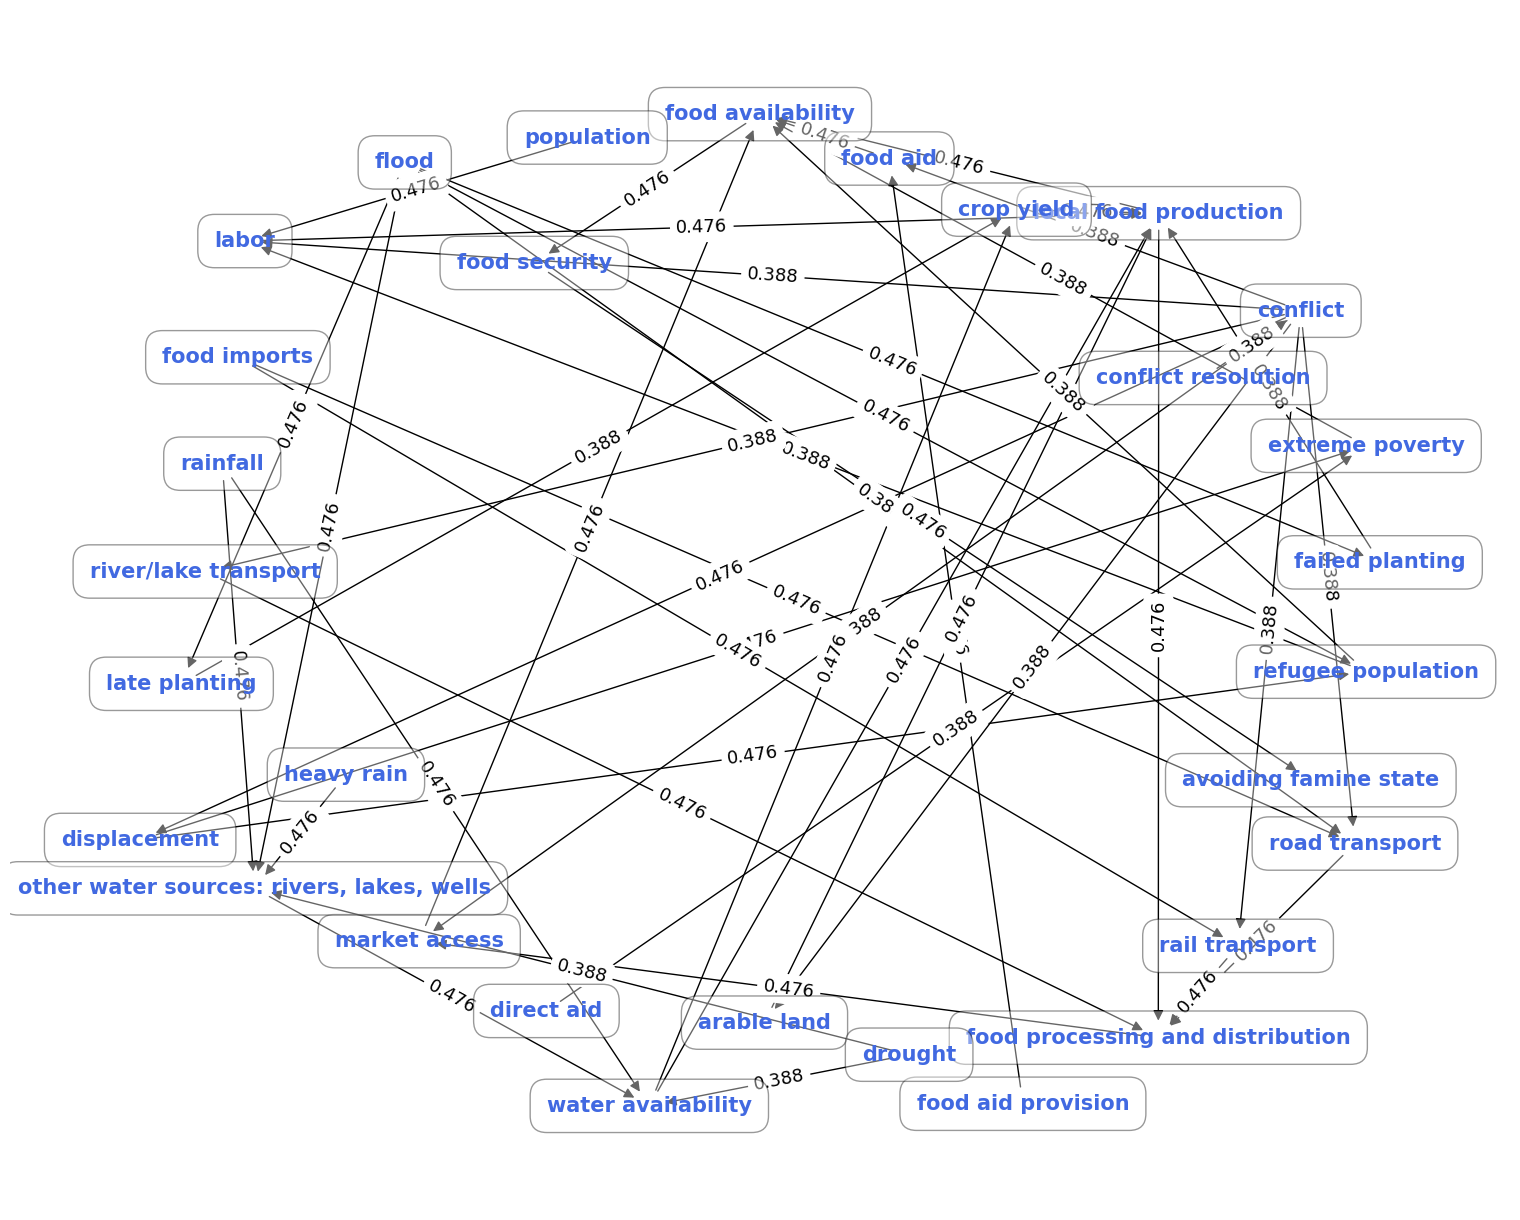

In [48]:
cwg = nx.DiGraph()

cwg.add_node("direct aid",id = str("direct aid"),title=str("direct aid"),x=615,y=200)
cwg.add_node("extreme poverty",id = str("extreme poverty"),title=str("extreme poverty"),x=615,y=200)
cwg.add_node("food aid provision",id = str("food aid provision"),title= str("food aid provision"),x=615,y=200)
cwg.add_node("food aid",id = str("food aid"),title=str("food aid"),x=615,y=200)
cwg.add_node("food availability",id = str("food availability"),title=str("food availability"),x=615,y=200)
cwg.add_node("displacement",id = str("Displacement"),title=str("Displacement"),x=615,y=200)
cwg.add_node("refugee population",id = str("refugee population"),title=str("refugee population"),x=615,y=200)
cwg.add_node("population",id = str("population"),title=str("population"),x=615,y=200)
cwg.add_node("labor",id = str("labor"),title=str("labor"),x=615,y=200)
cwg.add_node("local food production",id = str("local food production"),title=str("local food production"),x=615,y=200)
cwg.add_node("conflict resolution",id = str("conflict resolution"),title=str("conflict resolution"),x=615,y=200)
cwg.add_node("conflict",id = str("conflict"),title=str("conflict"),x=615,y=200)
cwg.add_node("market access",id = str("market access"),title=str("market access"),x=615,y=200)
cwg.add_node("road transport",id = str("road transport"),title=str("road transport"),x=615,y=200)
cwg.add_node("rail transport",id = str("rail transport"),title=str("rail transport"),x=615,y=200)
cwg.add_node("river/lake transport",id = str("river/lake transport"),title=str("river/lake transport"),x=615,y=200)
cwg.add_node("arable land",id = str("arable land"),title=str("arable land"),x=615,y=200)
cwg.add_node("food processing and distribution",id = str("food processing and distribution"),title=str("food processing and distribution"),x=615,y=200)
cwg.add_node("food imports",id = str("food imports"),title=str("food imports"),x=615,y=200)
cwg.add_node("flood",id = str("flood"),title=str("flood"),x=615,y=200)
cwg.add_node("failed planting",id = str("failed planting"),title=str("failed planting"),x=615,y=200)
cwg.add_node("late planting",id = str("late planting"),title=str("late planting"),x=615,y=200)
cwg.add_node("other water sources: rivers, lakes, wells",id = str("other water sources: rivers, lakes, wells"),title=str("other water sources: rivers, lakes, wells"),x=615,y=200)
cwg.add_node("crop yield",id = str("crop yield"),title=str("crop yield"),x=615,y=200)
cwg.add_node("heavy rain",id = str("heavy rain"),title=str("heavy rain"),x=615,y=200)
cwg.add_node("rainfall",id = str("rainfall"),title=str("rainfall"),x=615,y=200)
cwg.add_node("water availability",id = str("water availability"),title=str("water availability"),x=615,y=200)
cwg.add_node("drought",id = str("drought"),title=str("drought"),x=615,y=200)
cwg.add_node("food security",id = str("food security"),title=str("food security"),x=615,y=200)
cwg.add_node("avoiding famine state",id = str("avoiding famine state"),title=str("avoiding famine state"),x=615,y=200)

sources = ["direct aid","food aid provision", "food aid","displacement","refugee population","refugee population","displacement","population","labor"
,"extreme poverty","conflict resolution","conflict","conflict","conflict","conflict","conflict","conflict","conflict","conflict","market access"
,"road transport","food processing and distribution","rail transport","river/lake transport", "arable land","local food production"
,"local food production","food imports","food imports","flood","flood","flood","flood","flood","failed planting","late planting","crop yield"
,"heavy rain","rainfall","rainfall","drought","drought","other water sources: rivers, lakes, wells","water availability"
,"water availability","food availability","food security"]

destinations = ["extreme poverty", "food aid", "food availability", "refugee population", "food availability", "labor","extreme poverty", "labor"
, "local food production", "food availability", "conflict", "labor", "market access", "road transport", "rail transport"
, "river/lake transport", "arable land", "displacement","food aid","food availability", "food processing and distribution", "market access", "food processing and distribution"
, "food processing and distribution", "local food production", "food processing and distribution", "food availability"
, "road transport", "rail transport", "refugee population", "road transport", "failed planting", "late planting", "other water sources: rivers, lakes, wells"
, "local food production", "crop yield", "local food production", "other water sources: rivers, lakes, wells", "other water sources: rivers, lakes, wells"
, "water availability", "other water sources: rivers, lakes, wells", "water availability", "water availability", "crop yield"
, "local food production", "food security", "avoiding famine state"]

types = ["i","c","c","c","i","i","c","c","c","i","i","i","i","i","i","i","i","c","i","c","c","c","c","c","c","c","c","c","c","c"
       ,"i","c","c","c","i","i","c","c","c","c","i","i","c","c","c","c","c"]

for s,d,w,t in zip(sources,destinations, weights,types):
    if w < 0:
        w = w * -1
    cwg.add_edge(s, d, predicate=w, nature = t)
    #cwg.add_edge(s, d, predicate=str(ce[1]), polarity = p[0], weight = w)
    
print("Nodes:",len(cwg.nodes))
print("Edges:",len(cwg.edges))

for e in cwg.edges(data=True):
    print(e[0],",",e[2],",",e[1])
    

pos = nx.spring_layout(cwg, k=4, iterations=20)
plt.figure(figsize=(15,12))

nx.draw(cwg, pos=pos, with_labels=True,  node_shape="s",  node_color="none", font_size=15,  font_color='royalblue', font_weight='bold',bbox=dict(facecolor="white", alpha=0.4,boxstyle='round,pad=0.8'),labels={node: node for node in cwg.nodes()},arrows=True, arrowsize=15,width=1)
edge_labels = nx.get_edge_attributes(cwg,'predicate')
#edge_labels2 = nx.get_edge_attributes(cwg,'polarity')
#edge_labels3 = nx.get_edge_attributes(cwg,'weight')

nx.draw_networkx_edge_labels(cwg, pos=pos, edge_labels = edge_labels, font_color='black',font_size=13)

plt.axis('off')
plt.show()

In [ ]:
def FromTruthTable(i,inputs):
    count = 0

    if inputs==1:
        for a in range(1, -1, -1):
            if i == count:
                return (a)
            count = count+1

    if inputs==2:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                if i == count:
                    t = (a,b)
                    return t
                count = count+1
        
    elif inputs==3:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                for c in range(1, -1, -1):
                    if i == count:
                        t = (a,b,c)
                        return t
                    count = count+1
    
    elif inputs==4:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                for c in range(1, -1, -1):
                    for d in range(1, -1, -1):
                        if i == count:
                            t = (a,b,c,d)
                            return t
                        count = count+1

    elif inputs==5:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                for c in range(1, -1, -1):
                    for d in range(1, -1, -1):
                        for e in range(1,-1,-1):
                            if i == count:
                                t = (a,b,c,d,e)
                                return t
                            count = count+1
                            
    elif inputs==6:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                for c in range(1, -1, -1):
                    for d in range(1, -1, -1):
                        for e in range(1,-1,-1):
                            for f in range(1,-1,-1):
                                if i == count:
                                    t = (a,b,c,d,e,f)
                                    return t
                                count = count+1

class Tutorial1:
    #def __init__(self):
    def Add(self, net, id ,name, outcomes, x_pos, y_pos):
        e = self.create_cpt_node(net, id, name, outcomes, x_pos, y_pos)
        nodeNames.append(net.get_node_name(e))
        nodeIds.append(net.get_node_id(e))
        nodeHandles.append(e)
        net.write_file("./GeNie CBN/CBN.xdsl")
        
    def AddArcs(self, net, s, d):
        net.add_arc(s, d)
        net.write_file("./GeNie CBN/CBN.xdsl")

    def Addcpts(self, net, h, cpt):
        net. set_node_definition(h, cpt)
        net.write_file("./GeNie CBN/CBN.xdsl")
        
    def create_cpt_node(self, net, id, name, outcomes, x_pos, y_pos):
        handle = net.add_node(pysmile.NodeType.CPT, id)
        net.set_node_name(handle, name)
        net.set_node_position(handle, x_pos, y_pos, 85, 55)
        initial_outcome_count = net.get_outcome_count(handle)
        for i in range(0, initial_outcome_count):
            net.set_outcome_id(handle, i, outcomes[i])
        for i in range(initial_outcome_count, len(outcomes)):
            net.add_outcome(handle, outcomes[i])
        return handle
    
    def print_cpt_matrix(self, net, node_handle):
        cpt = net.get_node_definition(node_handle)
        return cpt
    

net = pysmile.Network()
obj = Tutorial1()
outcomes = ["True","False"]
nodeNames = []    
nodeIds = []
nodeHandles = []
# cpts=[]
PDs = []
baseline = 0.1
x = 160
y = 40

for node in cwg.nodes: 
    obj.Add(net, str(node),str(node), outcomes, x, y)
        
for e in cwg.edges():
    for id,name in zip(nodeIds,nodeNames):
        if name == e[0]:
            s = id
        if name == e[1]:
            d = id 
    obj.AddArcs(net, s, d)
    
for handle,name in zip(nodeHandles,nodeNames): 
    print("Handle:" + str(handle))
    print("Node:" + name)
    print(net.get_outcome_ids(handle))
    parent_ids = net.get_parent_ids(handle)
    num_parents = len(parent_ids)
    print("Number of Parents:" + str(num_parents))
    cpt = []
    parent_names = []
    totalCols = 1
    if num_parents == 0:
        cpt.append(baseline)
        cpt.append(1 - baseline)
        print("CPT:" + str(cpt))
        obj.Addcpts(net, handle, cpt)
        print("CPT from Network:")
        print(obj.print_cpt_matrix(net, handle))
        print("********************************************************************")
    elif num_parents > 0:
        for par in parent_ids:
                parent_names.append(net.get_node_name(par))
                totalCols = 2 ** num_parents
        print("Names of Parents:" + str(parent_names))
        print("totalCols:" + str(totalCols))
        for j in range(0, totalCols):
            print("j: "+str(j))
            PI = 1
            NI = 1
            ans = FromTruthTable(j,num_parents)
            print("From Dummy: "+str(ans))
            #for parent in parent_names:
            for p in range(0,len(parent_names)):
                for edge in cwg.edges(data=True):
                    if str(parent_names[p]) == str(edge[0]) and str(name) == str(edge[1]):
                        for nbr, eattr in edge[2].items():
                            if nbr == "predicate":
                                polarity = eattr
                            if nbr == "nature":
                                n = eattr
                        break
                print("Parent: " + parent_names[p])
                print("Polarity: " + str(polarity))
                print("p: "+str(p))
                if num_parents > 1:
                    if ans[p] == 0:
                        polarity = 0
                        print("New Polarity: " + str(polarity))
                else:
                    if ans == 0:
                        polarity = 0
                        print("New Polarity: " + str(polarity))
                #if polarity >= 0:
                    #polarity = polarity/4
                    #PI = PI * (1 - polarity)
                #else:
                    #polarity = polarity/ (-4)
                    #NI = NI * (1 - abs(polarity))
                if n == 'c':
                    PI = PI * (1 - polarity)
                else:
                    NI = NI * (1 - polarity)
            CP = 0
            PI = 1 - (1-baseline) * PI
            NI = NI
            CP = PI * NI  
            #CP = 0
            #if PI > NI:
                #CP = baseline + ((1 - baseline) * AI)
            #elif PI < NI:
                #CP = baseline - (baseline * AI)
            #elif PI == NI:
                #CP = baseline
            if CP == 0:
                CP = 0.01
            cpt.append(round(CP, 3))
            cpt.append(round((1 - CP), 3))
            pds = []
            pds.append(round(CP, 3))
            pds.append(round((1 - CP), 3))
            PDs.append(pds)
        print("CPT:" + str(cpt))
        obj.Addcpts(net, handle, cpt)
        print("CPT from Network:")
        print(obj.print_cpt_matrix(net, handle))
        print("********************************************************************")

In [ ]:
P = PDs
# Q = PDs
# Set Reference as DeMorgan Derived CPT
Q = [[0.091, 0.909], [0.01, 0.99], [0.91, 0.09], [0.1, 0.9], [0.309, 0.691], [0.91, 0.09], [0.034, 0.966], [0.1, 0.9], [0.065, 0.935], [0.06, 0.94], [0.06, 0.94], [0.046, 0.954], [0.096, 0.904], [0.09, 0.91], [0.09, 0.91], [0.069, 0.931], [0.06, 0.94], [0.046, 0.954], [0.046, 0.954], [0.007, 0.993], [0.09, 0.91], [0.069, 0.931], [0.069, 0.931], [0.01, 0.99], [0.646, 0.354], [0.6, 0.4], [0.6, 0.4], [0.465, 0.535], [0.965, 0.035], [0.896, 0.104], [0.896, 0.104], [0.694, 0.306], [0.6, 0.4], [0.465, 0.535], [0.465, 0.535], [0.067, 0.933], [0.896, 0.104], [0.694, 0.306], [0.694, 0.306], [0.1, 0.9], [0.91, 0.09], [0.1, 0.9], [0.94, 0.06], [0.91, 0.09], [0.397, 0.603], [0.1, 0.9], [0.158, 0.842], [0.236, 0.764], [0.023, 0.977], [0.034, 0.966], [0.465, 0.535], [0.694, 0.306], [0.067, 0.933], [0.1, 0.9], [0.34, 0.66], [0.34, 0.66], [0.34, 0.66], [0.34, 0.66], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.34, 0.66], [0.34, 0.66], [0.34, 0.66], [0.337, 0.663], [1.0, 0.0], [1.0, 0.0], [0.999, 0.001], [0.991, 0.009], [0.34, 0.66], [0.34, 0.66], [0.34, 0.66], [0.337, 0.663], [1.0, 0.0], [1.0, 0.0], [0.999, 0.001], [0.991, 0.009], [0.34, 0.66], [0.337, 0.663], [0.309, 0.691], [0.034, 0.966], [0.999, 0.001], [0.991, 0.009], [0.91, 0.09], [0.1, 0.9], [0.034, 0.966], [0.1, 0.9], [0.309, 0.691], [0.034, 0.966], [0.91, 0.09], [0.1, 0.9], [0.105, 0.895], [0.309, 0.691], [0.012, 0.988], [0.034, 0.966], [0.309, 0.691], [0.91, 0.09], [0.034, 0.966], [0.1, 0.9], [0.465, 0.535], [0.067, 0.933], [0.694, 0.306], [0.1, 0.9], [0.067, 0.933], [0.1, 0.9], [0.034, 0.966], [0.1, 0.9], [0.999, 0.001], [0.997, 0.003], [0.997, 0.003], [0.991, 0.009], [0.99, 0.01], [0.969, 0.031], [0.969, 0.031], [0.91, 0.09], [0.99, 0.01], [0.969, 0.031], [0.969, 0.031], [0.91, 0.09], [0.896, 0.104], [0.694, 0.306], [0.694, 0.306], [0.1, 0.9], [0.91, 0.09], [0.1, 0.9], [0.91, 0.09], [0.1, 0.9], [0.316, 0.684], [0.93, 0.07], [0.27, 0.73], [0.795, 0.205], [0.27, 0.73], [0.795, 0.205], [0.135, 0.865], [0.397, 0.603], [0.305, 0.695], [0.896, 0.104], [0.236, 0.764], [0.694, 0.306], [0.236, 0.764], [0.694, 0.306], [0.034, 0.966], [0.1, 0.9], [0.337, 0.663], [0.034, 0.966], [0.991, 0.009], [0.1, 0.9], [0.337, 0.663], [0.991, 0.009], [0.309, 0.691], [0.91, 0.09], [0.309, 0.691], [0.91, 0.09], [0.034, 0.966], [0.1, 0.9], [0.991, 0.009], [0.1, 0.9], [0.694, 0.306], [0.1, 0.9]]
# Set Reference as CAST Logic Derived CPT
# Q = [[0.1, 0.9], [0.01, 0.99], [0.91, 0.09], [0.1, 0.9], [0.735, 0.265], [0.91, 0.09], [0.034, 0.966], [0.1, 0.9], [0.472, 0.528], [0.058, 0.942], [0.058, 0.942], [0.02, 0.98], [0.646, 0.354], [0.087, 0.913], [0.087, 0.913], [0.029, 0.971], [0.058, 0.942], [0.02, 0.98], [0.02, 0.98], [0.007, 0.993], [0.087, 0.913], [0.029, 0.971], [0.029, 0.971], [0.01, 0.99], [0.947, 0.053], [0.845, 0.155], [0.845, 0.155], [0.543, 0.457], [0.965, 0.035], [0.896, 0.104], [0.896, 0.104], [0.694, 0.306], [0.845, 0.155], [0.543, 0.457], [0.543, 0.457], [0.067, 0.933], [0.896, 0.104], [0.694, 0.306], [0.694, 0.306], [0.1, 0.9], [0.91, 0.09], [0.1, 0.9], [0.94, 0.06], [0.91, 0.09], [0.397, 0.603], [0.1, 0.9], [0.008, 0.992], [0.012, 0.988], [0.023, 0.977], [0.034, 0.966], [0.023, 0.977], [0.034, 0.966], [0.067, 0.933], [0.1, 0.9], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.997, 0.003], [0.974, 0.026], [1.0, 0.0], [1.0, 0.0], [0.999, 0.001], [0.991, 0.009], [1.0, 0.0], [1.0, 0.0], [0.997, 0.003], [0.974, 0.026], [1.0, 0.0], [1.0, 0.0], [0.999, 0.001], [0.991, 0.009], [0.997, 0.003], [0.974, 0.026], [0.735, 0.265], [0.034, 0.966], [0.999, 0.001], [0.991, 0.009], [0.91, 0.09], [0.1, 0.9], [0.034, 0.966], [0.1, 0.9], [0.735, 0.265], [0.034, 0.966], [0.91, 0.09], [0.1, 0.9], [0.221, 0.779], [0.735, 0.265], [0.012, 0.988], [0.034, 0.966], [0.735, 0.265], [0.91, 0.09], [0.034, 0.966], [0.1, 0.9], [0.543, 0.457], [0.067, 0.933], [0.694, 0.306], [0.1, 0.9], [0.067, 0.933], [0.1, 0.9], [0.034, 0.966], [0.1, 0.9], [0.999, 0.001], [0.997, 0.003], [0.997, 0.003], [0.991, 0.009], [0.99, 0.01], [0.969, 0.031], [0.969, 0.031], [0.91, 0.09], [0.99, 0.01], [0.969, 0.031], [0.969, 0.031], [0.91, 0.09], [0.896, 0.104], [0.694, 0.306], [0.694, 0.306], [0.1, 0.9], [0.91, 0.09], [0.1, 0.9], [0.91, 0.09], [0.1, 0.9], [0.795, 0.205], [0.93, 0.07], [0.397, 0.603], [0.795, 0.205], [0.397, 0.603], [0.795, 0.205], [0.051, 0.949], [0.397, 0.603], [0.694, 0.306], [0.896, 0.104], [0.1, 0.9], [0.694, 0.306], [0.1, 0.9], [0.694, 0.306], [0.034, 0.966], [0.1, 0.9], [0.974, 0.026], [0.034, 0.966], [0.991, 0.009], [0.1, 0.9], [0.974, 0.026], [0.991, 0.009], [0.735, 0.265], [0.91, 0.09], [0.735, 0.265], [0.91, 0.09], [0.034, 0.966], [0.1, 0.9], [0.991, 0.009], [0.1, 0.9], [0.694, 0.306], [0.1, 0.9]]
print(len(P))
print(P)
print(len(Q))
print(Q)

In [ ]:
kl = []
for i in range(0,len(P)):
    k = kl_div(Q[i],P[i])
    kl.append(k.sum())

kl = np.array(kl)
kl_divergence = round((kl.sum())/30,3)
print(kl_divergence)